# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb
import missingno
import time
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
#from google.colab import drive

# Import Dataset

In [2]:
"""drive.mount('/content/drive')
dataset_path = '/content/drive/My Drive/Final Task/new dataset/jabodetabek_house_price.csv'

"""
#data = pd.read_csv(dataset_path)

data = pd.read_csv('jabodetabek_house_price.csv')
data

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0,1,2.0,5.0,2017.0,bagus,NaN,0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0,0,2.0,NaN,NaN,bagus,NaN,0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1,1,2.0,NaN,NaN,bagus,NaN,1,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1,1,2.0,6.0,2016.0,bagus sekali,utara,2,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1,1,2.0,9.0,2013.0,bagus,utara,1,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,https://www.rumah123.com/properti/tangerang/ho...,5.880000e+08,Terbaru Cluster Minimalis Sudimara Dekat Stasiun,"Jombang, Tangerang",Jombang,Tangerang,-6.296615,106.704601,"Masjid, Taman, Tempat Jemuran, Keamanan 24 ja...",rumah,...,1300 mah,0,0,1.0,0.0,2022.0,baru,NaN,1,furnished
3549,https://www.rumah123.com/properti/tangerang/ho...,7.850000e+08,Rumah Modern Asri dan Nyaman Bebas Banjir Loka...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Masjid, Keamanan, Jogging Track, Taman, Tem...",rumah,...,1300 mah,0,0,2.0,0.0,2022.0,baru,utara,0,unfurnished
3550,https://www.rumah123.com/properti/tangerang/ho...,7.550000e+08,Rumah Mewah Murah 2 Lantai Gratis Biaya Biaya ...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Keamanan, Taman, Jogging Track, Tempat Jemur...",rumah,...,1300 mah,0,0,2.0,0.0,2022.0,baru,utara,0,unfurnished
3551,https://www.rumah123.com/properti/tangerang/ho...,8.000000e+08,Rumah 2 Lantai Dekat Perkantoran BSD City AEON...,"BSD Provance Parkland, Tangerang",BSD Provance Parkland,Tangerang,-6.288237,106.665859,"Tempat Jemuran, Keamanan, Keamanan 24 jam, Was...",rumah,...,2200 mah,0,0,2.0,0.0,2022.0,baru,selatan,0,furnished


In [3]:
data.shape

(3553, 27)

In [4]:
# drop columns yang tidak perlu digunakan seperti link dan id admin dan sebagainya
columns_to_drops = ['url', 'title','address','lat','long','ads_id','property_type',
                    'building_orientation','facilities','building_age','year_built',
                    'district','certificate']

# Drop columns
data.drop(columns=columns_to_drops, inplace=True)



In [5]:
data.columns

Index(['price_in_rp', 'city', 'bedrooms', 'bathrooms', 'land_size_m2',
       'building_size_m2', 'carports', 'electricity', 'maid_bedrooms',
       'maid_bathrooms', 'floors', 'property_condition', 'garages',
       'furnishing'],
      dtype='object')

In [6]:
data = data.rename(columns={'price_in_rp': 'harga',
                              'city' : 'kota',
                              'bedrooms' : 'kamar_tidur',
                              'bathrooms': 'kamar_mandi',
                              'land_size_m2':'luas_tanah',
                              'building_size_m2':'luas_bangunan',
                              'carports' : 'tempat_parkir',
                              'electricity':'kelistrikan',
                              'maid_bedrooms':'kamar_tidur_pembantu',
                              'maid_bathrooms':'kamar_mandi_pembantu',
                              'floors':'lantai',
                              'property_condition':'kondisi_properti',
                              'garages':'garasi',
                              'furnishing':'perabotan'})

In [7]:
data.to_excel("output.xlsx", index=False)

In [8]:
#data.to_excel('databegins.xlsx',index = False)

In [9]:
data.shape

(3553, 14)

# Explotory Data Analysis (Data Praproses)

In [10]:
data['harga'] = data['harga'].apply(lambda x: '{:.0f}'.format(x))

# Mengubah kolom nilai_nominal_str menjadi float
data['harga'] = data['harga'].astype(float)


In [11]:
data.head(10)

,harga,kota,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,tempat_parkir,kelistrikan,kamar_tidur_pembantu,kamar_mandi_pembantu,lantai,kondisi_properti,garasi,perabotan
0,2.990000e+09,Bekasi,4.0,4.0,239.0,272.0,0,4400 mah,0,1,2.0,bagus,0,unfurnished
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,1,2200 mah,0,0,2.0,bagus,0,NaN
2,1.950000e+09,Bekasi,3.0,3.0,119.0,131.0,1,2200 mah,1,1,2.0,bagus,1,unfurnished
3,3.300000e+09,Bekasi,3.0,3.0,180.0,174.0,0,3500 mah,1,1,2.0,bagus sekali,2,unfurnished
4,4.500000e+09,Bekasi,4.0,3.0,328.0,196.0,2,3500 mah,1,1,2.0,bagus,1,unfurnished
5,2.700000e+09,Bekasi,3.0,3.0,136.0,200.0,2,3500 mah,1,1,2.0,bagus,1,semi furnished
6,2.350000e+09,Bekasi,2.0,2.0,144.0,144.0,1,4400 mah,0,0,2.0,NaN,1,NaN
7,4.500000e+09,Bekasi,4.0,4.0,216.0,250.0,2,3500 mah,1,1,2.0,NaN,1,NaN
8,2.900000e+09,Bekasi,NaN,3.0,200.0,152.0,2,4400 mah,3,1,2.0,NaN,0,semi furnished
9,2.700000e+09,Bekasi,3.0,3.0,136.0,200.0,1,3500 mah,1,1,2.0,NaN,1,semi furnished


In [12]:
data.columns

Index(['harga', 'kota', 'kamar_tidur', 'kamar_mandi', 'luas_tanah',
       'luas_bangunan', 'tempat_parkir', 'kelistrikan', 'kamar_tidur_pembantu',
       'kamar_mandi_pembantu', 'lantai', 'kondisi_properti', 'garasi',
       'perabotan'],
      dtype='object')

## Handling Missing Data

In [13]:
def summarize_features(df):
    # tipe data
    summary = pd.DataFrame(df.dtypes,columns = ['dtypes'])
    summary = summary.reset_index()

    # jumlah missing value
    summary['missing'] = df.isnull().sum().values
    # jumlah unique value
    summary['Uniques'] = df.nunique().values

    return summary
summarize_features(data)

,index,dtypes,missing,Uniques
0,harga,float64,0,660
1,kota,object,0,9
2,kamar_tidur,float64,34,22
3,kamar_mandi,float64,29,22
4,luas_tanah,float64,2,481
5,luas_bangunan,float64,2,358
6,tempat_parkir,int64,0,13
7,kelistrikan,object,0,30
8,kamar_tidur_pembantu,int64,0,8
9,kamar_mandi_pembantu,int64,0,6


<Axes: >

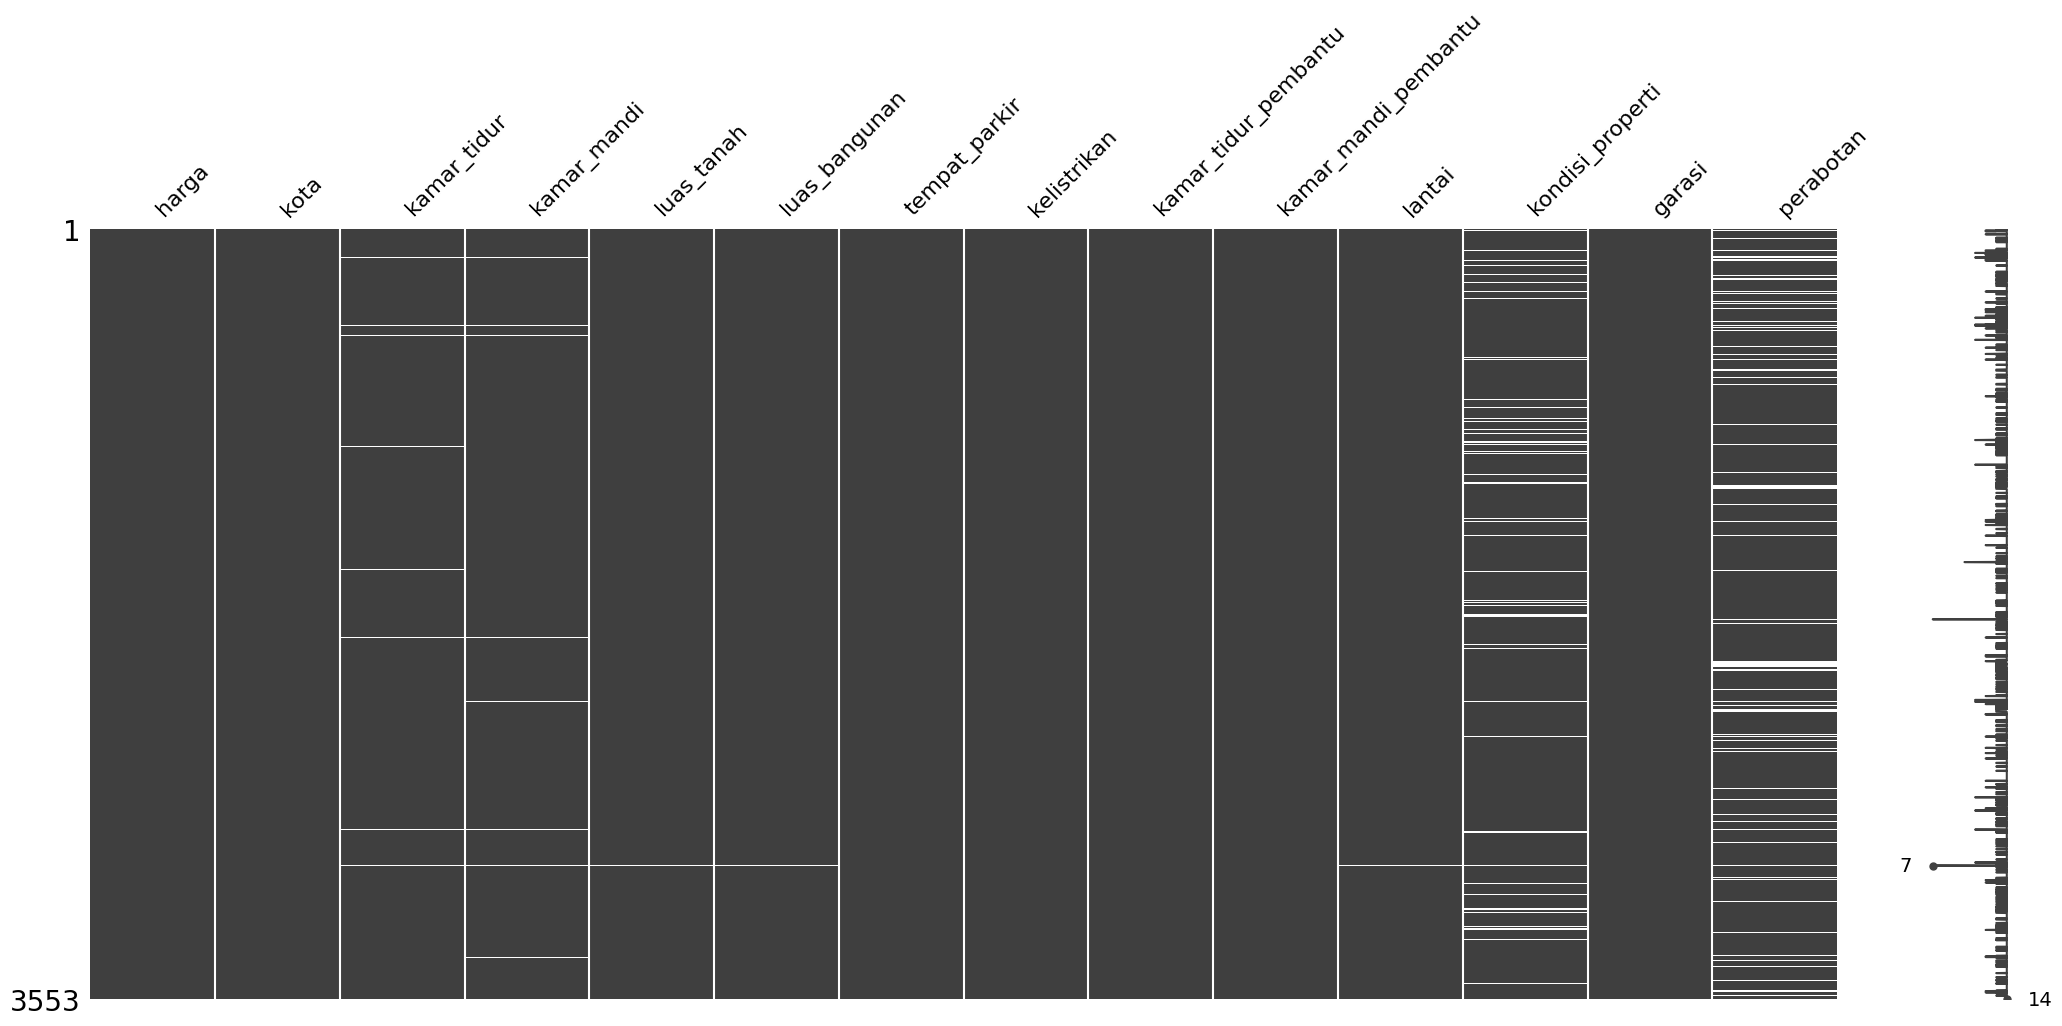

In [14]:
missingno.matrix(data)

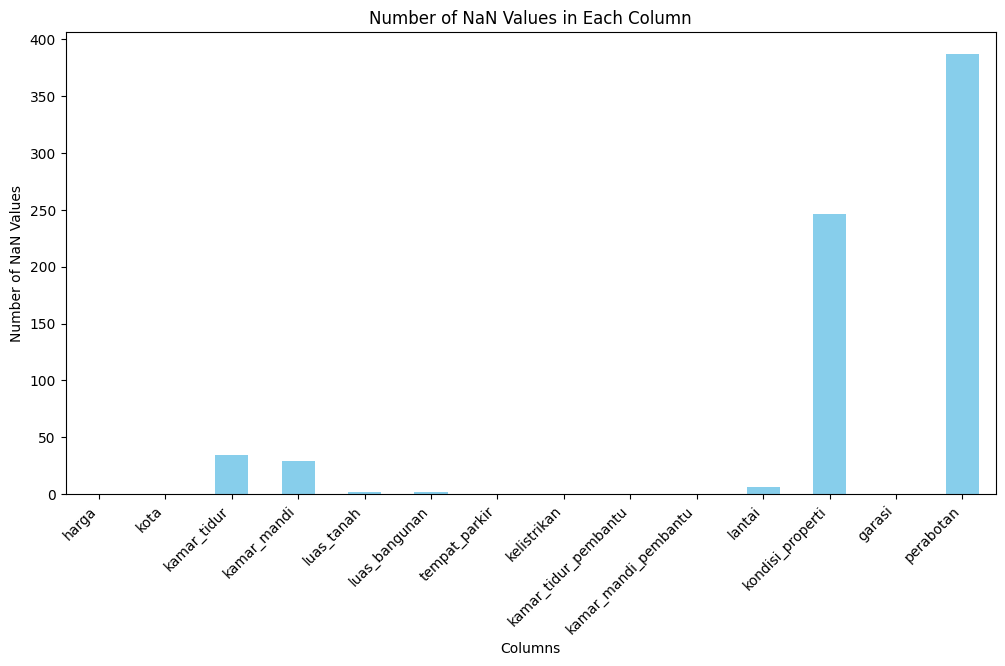

In [15]:
# Count the number of NaN values in each column
nan_counts = data.isnull().sum()

# Plot the number of NaN values for each column
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()


### Drop Cols with less NaN value

In [16]:
less_nan = data[data['kamar_mandi'].isna() | data['kamar_tidur'].isna() | data['luas_tanah'].isna() |data['lantai'].isna()| data['luas_bangunan'].isna()]
less_nan

,harga,kota,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,tempat_parkir,kelistrikan,kamar_tidur_pembantu,kamar_mandi_pembantu,lantai,kondisi_properti,garasi,perabotan
8,2.900000e+09,Bekasi,NaN,3.0,200.0,152.0,2,4400 mah,3,1,2.0,NaN,0,semi furnished
24,2.000000e+09,Bekasi,NaN,NaN,164.0,155.0,0,2200 mah,0,0,1.0,bagus,0,semi furnished
60,1.200000e+09,Bekasi,NaN,2.0,120.0,90.0,2,2200 mah,0,0,2.0,baru,0,furnished
110,7.790000e+08,Bekasi,NaN,NaN,63.0,53.0,0,2200 mah,0,0,1.0,baru,0,NaN
131,2.170000e+09,Bekasi,NaN,NaN,144.0,121.0,0,2200 mah,0,0,1.0,bagus,0,NaN
409,3.750000e+08,Bekasi,NaN,NaN,60.0,60.0,0,900 mah,0,0,1.0,butuh renovasi,0,NaN
441,5.500000e+08,Bekasi,NaN,NaN,120.0,100.0,1,2200 mah,0,0,1.0,bagus,0,NaN
445,3.900000e+08,Bekasi,NaN,NaN,60.0,36.0,0,1300 mah,0,0,1.0,bagus,0,NaN
491,8.500000e+08,Bekasi,NaN,NaN,113.0,90.0,2,2200 mah,0,0,2.0,baru,0,unfurnished
497,9.300000e+08,Bekasi,2.0,NaN,60.0,48.0,1,2200 mah,1,0,1.0,butuh renovasi,0,unfurnished


In [17]:
dropped_less = data.drop(less_nan.index, axis=0)
dropped_less.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3510 entries, 0 to 3552
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   harga                 3510 non-null   float64
 1   kota                  3510 non-null   object 
 2   kamar_tidur           3510 non-null   float64
 3   kamar_mandi           3510 non-null   float64
 4   luas_tanah            3510 non-null   float64
 5   luas_bangunan         3510 non-null   float64
 6   tempat_parkir         3510 non-null   int64  
 7   kelistrikan           3510 non-null   object 
 8   kamar_tidur_pembantu  3510 non-null   int64  
 9   kamar_mandi_pembantu  3510 non-null   int64  
 10  lantai                3510 non-null   float64
 11  kondisi_properti      3273 non-null   object 
 12  garasi                3510 non-null   int64  
 13  perabotan             3142 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 411.3+ KB


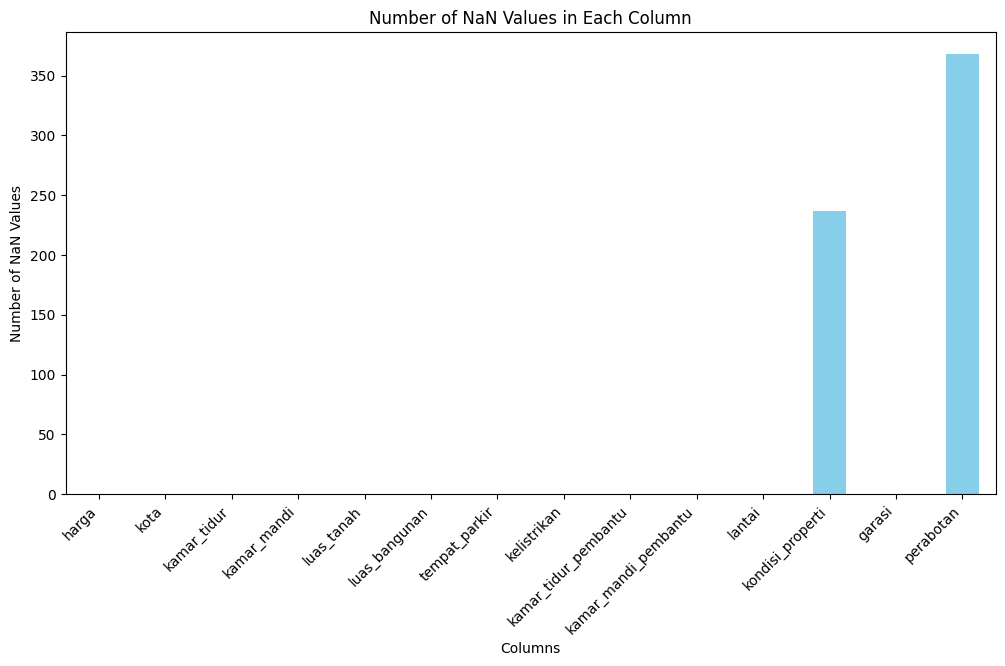

In [18]:
# Count the number of NaN values in each column
nan_counts = dropped_less.isnull().sum()

# Plot the number of NaN values for each column
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()


In [19]:
dropped_less.shape

(3510, 14)

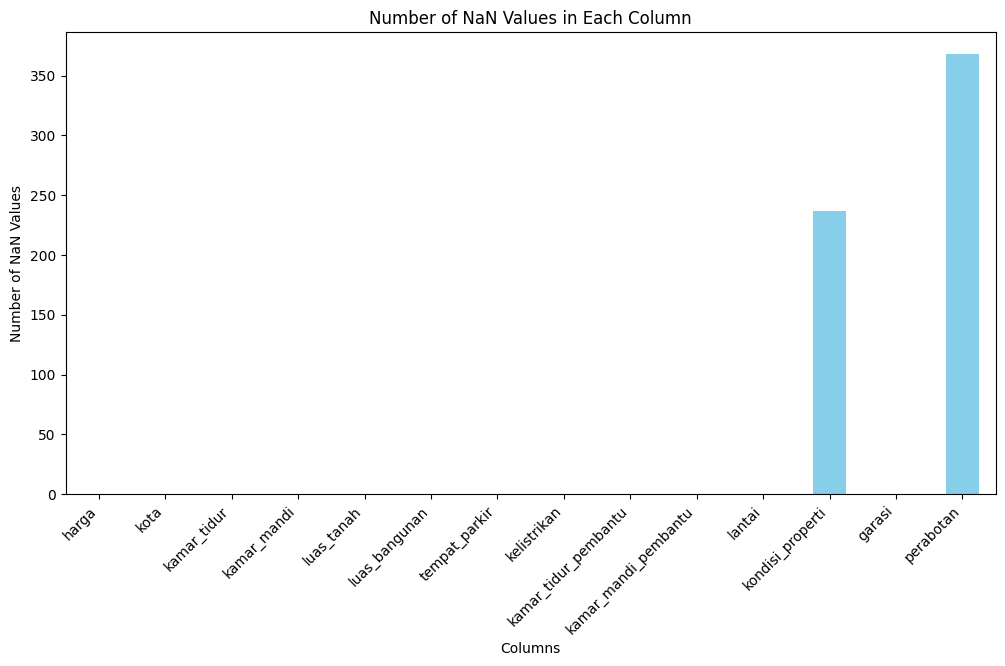

In [20]:
# Count the number of NaN values in each column
nan_counts = dropped_less.isnull().sum()

# Plot the number of NaN values for each column
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()


### Handle Property Condition and Furnishing

In [21]:
cek_kondisi = dropped_less[['kondisi_properti','kota','harga','kelistrikan']]

In [22]:
cek_kondisi['kondisi_properti'] = cek_kondisi['kondisi_properti'].replace(np.nan,'missing values')

C:\Users\gayung\AppData\Local\Temp\ipykernel_5676\1307832961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cek_kondisi['kondisi_properti'] = cek_kondisi['kondisi_properti'].replace(np.nan,'missing values')


In [23]:
cek_kondisi

,kondisi_properti,kota,harga,kelistrikan
0,bagus,Bekasi,2.990000e+09,4400 mah
1,bagus,Bekasi,1.270000e+09,2200 mah
2,bagus,Bekasi,1.950000e+09,2200 mah
3,bagus sekali,Bekasi,3.300000e+09,3500 mah
4,bagus,Bekasi,4.500000e+09,3500 mah
...,...,...,...,...
3548,baru,Tangerang,5.880000e+08,1300 mah
3549,baru,Tangerang,7.850000e+08,1300 mah
3550,baru,Tangerang,7.550000e+08,1300 mah
3551,baru,Tangerang,8.000000e+08,2200 mah


In [24]:
grouped_cek = cek_kondisi.groupby('kota')['kondisi_properti'].value_counts().unstack(fill_value=0)
grouped_cek

kondisi_properti,bagus,bagus sekali,baru,butuh renovasi,missing values,sudah renovasi
kota,,,,,,
Bekasi,213,13,243,14,49,42
Bogor,364,70,308,27,64,40
Depok,227,15,225,4,44,5
Jakarta Barat,89,24,60,9,9,14
Jakarta Pusat,12,2,17,3,4,0
Jakarta Selatan,101,33,77,13,9,6
Jakarta Timur,27,4,59,2,2,1
Jakarta Utara,46,25,40,7,1,5
Tangerang,345,75,316,9,55,42


In [25]:
for index, row in dropped_less.iterrows():
    if row['kota'] in ['Bekasi', ' Jakarta Pusat', ' Jakarta Timur']:
        if pd.isnull(row['kondisi_properti']):
            dropped_less.at[index, 'kondisi_properti'] = 'baru'
    else:
        if pd.isnull(row['kondisi_properti']):
            dropped_less.at[index, 'kondisi_properti'] = 'bagus'

In [26]:
cek_kondisi2 = dropped_less[['perabotan','kota','harga']]

In [27]:
cek_kondisi2['perabotan'] = cek_kondisi2['perabotan'].replace(np.nan,'missing values')

C:\Users\gayung\AppData\Local\Temp\ipykernel_5676\1905923610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cek_kondisi2['perabotan'] = cek_kondisi2['perabotan'].replace(np.nan,'missing values')


In [28]:
grouped_cek2 = cek_kondisi2.groupby('kota')['perabotan'].value_counts().unstack(fill_value=0)
grouped_cek2

perabotan,furnished,missing values,semi furnished,unfurnished
kota,,,,
Bekasi,19,85,101,369
Bogor,60,75,165,573
Depok,15,27,70,408
Jakarta Barat,20,63,53,69
Jakarta Pusat,3,2,5,28
Jakarta Selatan,22,32,99,86
Jakarta Timur,2,5,9,79
Jakarta Utara,7,12,52,53
Tangerang,90,67,274,411


In [29]:
for index, row in dropped_less.iterrows():
    if row['perabotan'] in [' Jakarta Selatan']:
        if pd.isnull(row['perabotan']):
            dropped_less.at[index, 'perabotan'] = 'semi unfurnished'
    else:
        if pd.isnull(row['perabotan']):
            dropped_less.at[index, 'perabotan'] = 'unfurnished'

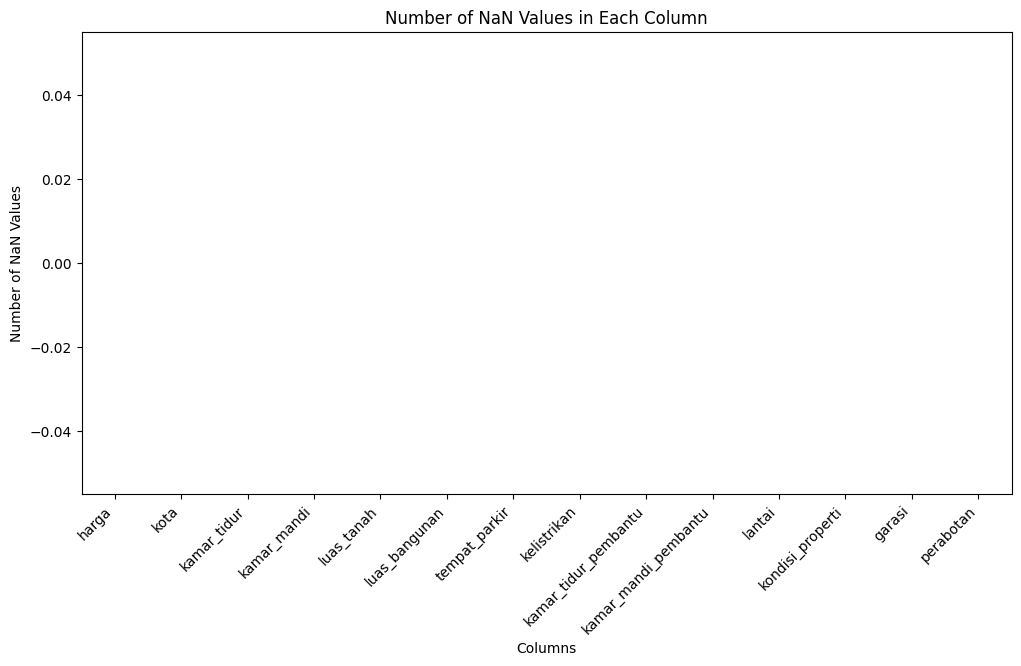

In [30]:
# Count the number of NaN values in each column
nan_counts = dropped_less.isnull().sum()
# Plot the number of NaN values for each column
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()


### Handling electricity

In [31]:
filled_house = dropped_less.copy()

In [32]:
filled_house['kelistrikan'].unique()

array(['4400 mah', '2200 mah', '3500 mah', '1300 mah', 'lainnya mah',
       '5500 mah', '6600 mah', '7700 mah', '3300 mah', '7600 mah',
       '10600 mah', '900 mah', '47500 mah', '11000 mah', '8000 mah',
       '450 mah', '10000 mah', '53000 mah', '16500 mah', '13200 mah',
       '13900 mah', '17600 mah', '23000 mah', '41500 mah', '12700 mah',
       '13300 mah', '33000 mah', '24000 mah', '22000 mah', '9500 mah'],
      dtype=object)

In [33]:
# tranform data kolom electricity
filled_house['kelistrikan'] = filled_house['kelistrikan'].replace('lainnya mah',0)
filled_house['kelistrikan'] = filled_house['kelistrikan'].str.replace('mah','')
filled_house['kelistrikan'] = filled_house['kelistrikan'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else float(x))

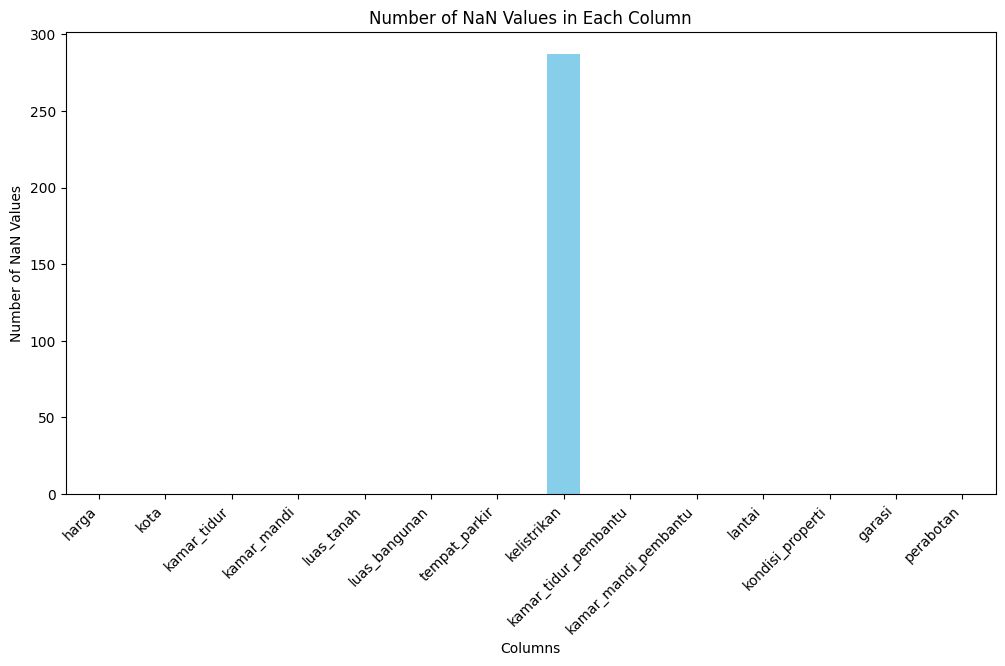

In [34]:
# Count the number of NaN values in each column
nan_counts = filled_house.isnull().sum()

# Plot the number of NaN values for each column
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
# drop NaN electricity
#filled_house = filled_house.dropna()
#interpolate (electricity)
#filled_house = filled_house.interpolate()

In [36]:
"""filled_house.shape
filled_house = filled_house.reset_index(drop = True)"""

'filled_house.shape\nfilled_house = filled_house.reset_index(drop = True)'

In [37]:
#Pilih nama kolom yang ingin Anda periksa
nama_kolom = 'kelistrikan'

# Menampilkan baris yang memiliki nilai NaN pada kolom tertentu
nan_rows_in_column = filled_house[filled_house[nama_kolom].isna()]

# Menampilkan hasil
nan_rows_in_column

,harga,kota,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,tempat_parkir,kelistrikan,kamar_tidur_pembantu,kamar_mandi_pembantu,lantai,kondisi_properti,garasi,perabotan
26,2.350000e+09,Bekasi,3.0,2.0,119.0,140.0,1,NaN,0,0,2.0,bagus,0,furnished
29,1.900000e+09,Bekasi,2.0,3.0,91.0,120.0,2,NaN,0,0,2.0,bagus sekali,0,unfurnished
45,1.300000e+09,Bekasi,4.0,3.0,84.0,105.0,0,NaN,0,0,2.0,baru,0,unfurnished
56,2.750000e+08,Bekasi,2.0,1.0,60.0,36.0,1,NaN,0,0,1.0,baru,1,semi furnished
117,4.300000e+09,Bekasi,4.0,4.0,325.0,200.0,2,NaN,1,1,3.0,bagus,1,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443,3.700000e+09,Tangerang,3.0,3.0,120.0,135.0,0,NaN,0,1,2.0,baru,0,unfurnished
3459,1.400000e+09,Tangerang,3.0,2.0,60.0,72.0,2,NaN,0,0,2.0,baru,0,unfurnished
3493,2.350000e+09,Tangerang,3.0,2.0,237.0,125.0,2,NaN,0,0,2.0,bagus sekali,0,semi furnished
3521,1.250000e+08,Tangerang,2.0,1.0,60.0,36.0,0,NaN,0,0,1.0,bagus,0,unfurnished


In [38]:
filled_house['kelistrikan'].value_counts()

kelistrikan
2200.0     1378
1300.0      799
4400.0      265
3500.0      259
5500.0      182
3300.0       91
7700.0       61
6600.0       38
11000.0      26
16500.0      24
10000.0      15
10600.0      13
13200.0      12
900.0        12
23000.0       7
7600.0        7
8000.0        6
33000.0       5
13300.0       4
13900.0       4
17600.0       3
24000.0       2
450.0         2
53000.0       2
9500.0        2
12700.0       1
41500.0       1
47500.0       1
22000.0       1
Name: count, dtype: int64

In [39]:
grouped_cek = filled_house.groupby('kota')['kelistrikan'].value_counts().unstack(fill_value=0)
#grouped_cek.to_excel('kelompok_kelistrikan.xlsx', index=False)
grouped_cek

kelistrikan,450.0,900.0,1300.0,2200.0,3300.0,3500.0,4400.0,5500.0,6600.0,7600.0,...,13900.0,16500.0,17600.0,22000.0,23000.0,24000.0,33000.0,41500.0,47500.0,53000.0
kota,,,,,,,,,,,,,,,,,,,,,
Bekasi,2,2,202,262,13,34,19,11,2,2,...,0,0,0,0,0,0,0,0,1,0
Bogor,0,7,319,279,32,46,49,59,9,0,...,0,0,0,0,0,0,0,0,0,1
Depok,0,2,150,271,9,30,11,5,1,0,...,0,0,0,0,0,0,0,0,0,0
Jakarta Barat,0,0,1,71,3,19,40,18,3,0,...,0,0,0,0,0,0,0,0,0,0
Jakarta Pusat,0,0,0,19,0,1,4,0,3,0,...,2,2,0,1,1,1,0,0,0,0
Jakarta Selatan,0,0,1,54,11,20,22,18,10,2,...,0,12,3,0,4,1,5,1,0,1
Jakarta Timur,0,0,3,67,5,6,2,7,0,0,...,0,0,0,0,0,0,0,0,0,0
Jakarta Utara,0,0,3,4,0,2,43,11,5,1,...,1,5,0,0,0,0,0,0,0,0
Tangerang,0,1,120,351,18,101,75,53,5,2,...,1,5,0,0,2,0,0,0,0,0


In [40]:
#filled_house['kelistrikan'] = filled_house['kelistrikan'].fillna(3300)
#filled_house = filled_house.dropna()
#filled_house['kelistrikan'] = filled_house['kelistrikan'].interpolate('linear')


In [41]:
for index, row in filled_house.iterrows():
    if row['kelistrikan'] in [' Bogor']:
        if pd.isnull(row['kelistrikan']):
            filled_house.at[index, 'kelistrikan'] = 1300.0
    if row['kelistrikan'] in [' Jakarta Utara']:
        if pd.isnull(row['kelistrikan']):
            filled_house.at[index, 'kelistrikan'] = 4400.0
    else:
        if pd.isnull(row['kelistrikan']):
            filled_house.at[index, 'kelistrikan'] = 2200.0

In [42]:
rows_to_display = filled_house.iloc[20:47]
rows_to_display

,harga,kota,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,tempat_parkir,kelistrikan,kamar_tidur_pembantu,kamar_mandi_pembantu,lantai,kondisi_properti,garasi,perabotan
21,1.250000e+08,Bekasi,3.0,1.0,110.0,110.0,0,1300.0,0,0,2.0,baru,0,unfurnished
22,1.980000e+09,Bekasi,2.0,2.0,119.0,98.0,1,3500.0,0,0,2.0,bagus,1,semi furnished
23,7.640000e+08,Bekasi,3.0,3.0,78.0,83.0,2,2200.0,0,0,2.0,baru,0,unfurnished
25,7.640000e+08,Bekasi,3.0,3.0,78.0,83.0,2,2200.0,0,0,2.0,baru,0,unfurnished
26,2.350000e+09,Bekasi,3.0,2.0,119.0,140.0,1,2200.0,0,0,2.0,bagus,0,furnished
27,2.550000e+09,Bekasi,3.0,2.0,144.0,186.0,1,2200.0,1,1,2.0,sudah renovasi,1,unfurnished
28,4.800000e+08,Bekasi,2.0,1.0,55.0,30.0,1,1300.0,0,0,1.0,baru,0,unfurnished
29,1.900000e+09,Bekasi,2.0,3.0,91.0,120.0,2,2200.0,0,0,2.0,bagus sekali,0,unfurnished
30,3.000000e+08,Bekasi,2.0,1.0,60.0,36.0,1,1300.0,0,0,1.0,baru,0,semi furnished
31,5.270000e+09,Bekasi,4.0,3.0,192.0,307.0,2,3500.0,1,1,3.0,baru,0,unfurnished


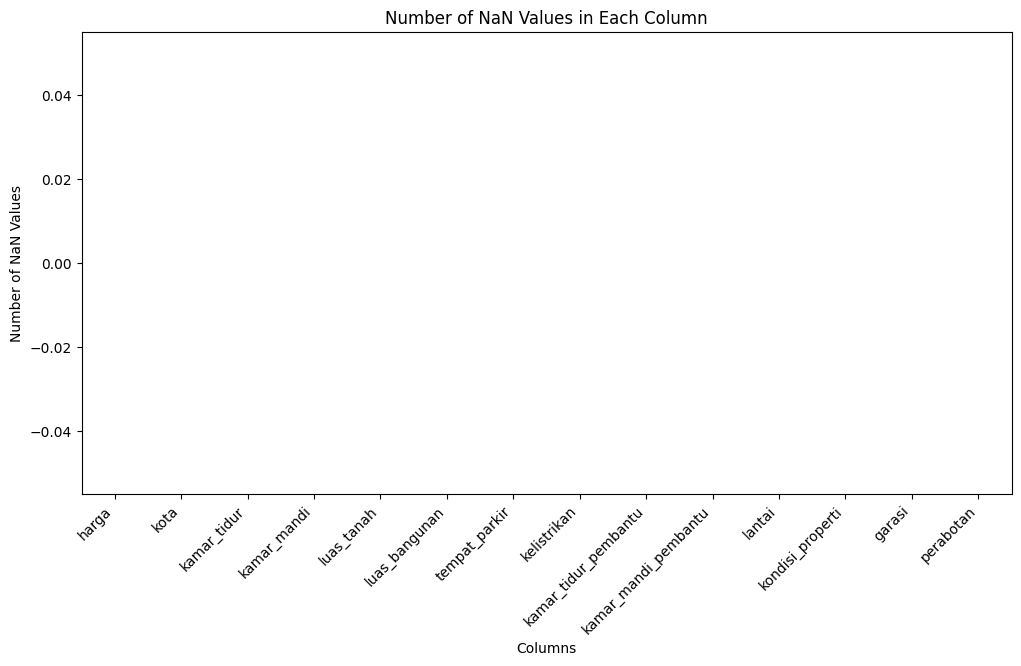

In [43]:
# Count the number of NaN values in each column
nan_counts = filled_house.isnull().sum()

# Plot the number of NaN values for each column
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
filled_house.to_excel('datarumah.xlsx', index=False)

## Encoding Categorical Value

In [45]:
encode_col = filled_house.copy()
cat_col = [col for col in encode_col.columns if encode_col[col].dtype == 'object']
cat_col

['kota', 'kondisi_properti', 'perabotan']

In [46]:
for column in cat_col:
    print(f"Unique values in {column}:\n{encode_col[column].unique()}\n")

Unique values in kota:
[' Bekasi' ' Bogor' ' Depok' ' Jakarta Barat' ' Jakarta Selatan'
 ' Jakarta Utara' ' Jakarta Timur' ' Jakarta Pusat' ' Tangerang']

Unique values in kondisi_properti:
['bagus' 'bagus sekali' 'baru' 'sudah renovasi' 'butuh renovasi']

Unique values in perabotan:
['unfurnished' 'semi furnished' 'furnished']



In [47]:
encode_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3510 entries, 0 to 3552
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   harga                 3510 non-null   float64
 1   kota                  3510 non-null   object 
 2   kamar_tidur           3510 non-null   float64
 3   kamar_mandi           3510 non-null   float64
 4   luas_tanah            3510 non-null   float64
 5   luas_bangunan         3510 non-null   float64
 6   tempat_parkir         3510 non-null   int64  
 7   kelistrikan           3510 non-null   float64
 8   kamar_tidur_pembantu  3510 non-null   int64  
 9   kamar_mandi_pembantu  3510 non-null   int64  
 10  lantai                3510 non-null   float64
 11  kondisi_properti      3510 non-null   object 
 12  garasi                3510 non-null   int64  
 13  perabotan             3510 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 540.4+ KB


### Encode Property Condition

In [48]:
encode_col['kondisi_properti'].unique()

array(['bagus', 'bagus sekali', 'baru', 'sudah renovasi',
       'butuh renovasi'], dtype=object)

In [49]:
encode_col['kondisi_properti']

0              bagus
1              bagus
2              bagus
3       bagus sekali
4              bagus
            ...     
3548            baru
3549            baru
3550            baru
3551            baru
3552            baru
Name: kondisi_properti, Length: 3510, dtype: object

In [50]:
from sklearn.preprocessing import OrdinalEncoder

property_condition_column = encode_col[['kondisi_properti']]

category_order = ['butuh renovasi', 'sudah renovasi', 'baru', 'bagus',  'bagus sekali']

encoder = OrdinalEncoder(categories=[category_order], dtype=int)

encoded_property_condition = encoder.fit_transform(property_condition_column)

encode_col['en_kondisi_properti'] = encoded_property_condition

encode_col


,harga,kota,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,tempat_parkir,kelistrikan,kamar_tidur_pembantu,kamar_mandi_pembantu,lantai,kondisi_properti,garasi,perabotan,en_kondisi_properti
0,2.990000e+09,Bekasi,4.0,4.0,239.0,272.0,0,4400.0,0,1,2.0,bagus,0,unfurnished,3
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,1,2200.0,0,0,2.0,bagus,0,unfurnished,3
2,1.950000e+09,Bekasi,3.0,3.0,119.0,131.0,1,2200.0,1,1,2.0,bagus,1,unfurnished,3
3,3.300000e+09,Bekasi,3.0,3.0,180.0,174.0,0,3500.0,1,1,2.0,bagus sekali,2,unfurnished,4
4,4.500000e+09,Bekasi,4.0,3.0,328.0,196.0,2,3500.0,1,1,2.0,bagus,1,unfurnished,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,5.880000e+08,Tangerang,2.0,1.0,72.0,36.0,1,1300.0,0,0,1.0,baru,1,furnished,2
3549,7.850000e+08,Tangerang,3.0,2.0,85.0,60.0,1,1300.0,0,0,2.0,baru,0,unfurnished,2
3550,7.550000e+08,Tangerang,3.0,2.0,78.0,60.0,1,1300.0,0,0,2.0,baru,0,unfurnished,2
3551,8.000000e+08,Tangerang,3.0,2.0,60.0,65.0,2,2200.0,0,0,2.0,baru,0,furnished,2


In [51]:
encode_property = encode_col[['kondisi_properti','en_kondisi_properti']]

In [52]:
encode_property

,kondisi_properti,en_kondisi_properti
0,bagus,3
1,bagus,3
2,bagus,3
3,bagus sekali,4
4,bagus,3
...,...,...
3548,baru,2
3549,baru,2
3550,baru,2
3551,baru,2


### Encode Furnishing

In [53]:
encode_col['perabotan'].unique()

array(['unfurnished', 'semi furnished', 'furnished'], dtype=object)

In [54]:
# Extract the 'furnishing' column as a 2D array (required by OrdinalEncoder)
furnishing_column = encode_col[['perabotan']]

# Define the order of categories
category_order = [ 'unfurnished', 'semi furnished',  'furnished']

# Create an instance of OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[category_order], dtype=int)

# Fit and transform the 'furnishing' column
encoded_furnishing = encoder.fit_transform(furnishing_column)

# Replace the original 'furnishing' column with the encoded values
encode_col['en_perabotan'] = encoded_furnishing

# Display the updated DataFrame
encode_col


,harga,kota,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,tempat_parkir,kelistrikan,kamar_tidur_pembantu,kamar_mandi_pembantu,lantai,kondisi_properti,garasi,perabotan,en_kondisi_properti,en_perabotan
0,2.990000e+09,Bekasi,4.0,4.0,239.0,272.0,0,4400.0,0,1,2.0,bagus,0,unfurnished,3,0
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,1,2200.0,0,0,2.0,bagus,0,unfurnished,3,0
2,1.950000e+09,Bekasi,3.0,3.0,119.0,131.0,1,2200.0,1,1,2.0,bagus,1,unfurnished,3,0
3,3.300000e+09,Bekasi,3.0,3.0,180.0,174.0,0,3500.0,1,1,2.0,bagus sekali,2,unfurnished,4,0
4,4.500000e+09,Bekasi,4.0,3.0,328.0,196.0,2,3500.0,1,1,2.0,bagus,1,unfurnished,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,5.880000e+08,Tangerang,2.0,1.0,72.0,36.0,1,1300.0,0,0,1.0,baru,1,furnished,2,2
3549,7.850000e+08,Tangerang,3.0,2.0,85.0,60.0,1,1300.0,0,0,2.0,baru,0,unfurnished,2,0
3550,7.550000e+08,Tangerang,3.0,2.0,78.0,60.0,1,1300.0,0,0,2.0,baru,0,unfurnished,2,0
3551,8.000000e+08,Tangerang,3.0,2.0,60.0,65.0,2,2200.0,0,0,2.0,baru,0,furnished,2,2


In [55]:
encode_furnishing = encode_col[['perabotan','en_perabotan']]

In [56]:
encode_furnishing

,perabotan,en_perabotan
0,unfurnished,0
1,unfurnished,0
2,unfurnished,0
3,unfurnished,0
4,unfurnished,0
...,...,...
3548,furnished,2
3549,unfurnished,0
3550,unfurnished,0
3551,furnished,2


### Encode City

In [57]:
encode_col['kota'].unique()

array([' Bekasi', ' Bogor', ' Depok', ' Jakarta Barat',
       ' Jakarta Selatan', ' Jakarta Utara', ' Jakarta Timur',
       ' Jakarta Pusat', ' Tangerang'], dtype=object)

In [58]:
city_column = encode_col[['kota']]

# Define the order of categories
category_order = [' Bekasi', ' Bogor', ' Depok', ' Tangerang',
                  ' Jakarta Pusat', ' Jakarta Timur', ' Jakarta Utara',
                  ' Jakarta Barat', ' Jakarta Selatan']
'''
category_order = [' Bekasi', ' Depok', ' Bogor', ' Jakarta Timur',
                  ' Tangerang', ' Jakarta Barat', ' Jakarta Utara',
                  ' Jakarta Pusat', ' Jakarta Selatan']'''
# Create an instance of OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[category_order], dtype=int)

# Fit and transform the 'certificate' column
encoded_city = encoder.fit_transform(city_column)

# Replace the original 'certificate' column with the encoded values
encode_col['en_kota'] = encoded_city

# Display the updated DataFrame
encode_col

,harga,kota,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,tempat_parkir,kelistrikan,kamar_tidur_pembantu,kamar_mandi_pembantu,lantai,kondisi_properti,garasi,perabotan,en_kondisi_properti,en_perabotan,en_kota
0,2.990000e+09,Bekasi,4.0,4.0,239.0,272.0,0,4400.0,0,1,2.0,bagus,0,unfurnished,3,0,0
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,1,2200.0,0,0,2.0,bagus,0,unfurnished,3,0,0
2,1.950000e+09,Bekasi,3.0,3.0,119.0,131.0,1,2200.0,1,1,2.0,bagus,1,unfurnished,3,0,0
3,3.300000e+09,Bekasi,3.0,3.0,180.0,174.0,0,3500.0,1,1,2.0,bagus sekali,2,unfurnished,4,0,0
4,4.500000e+09,Bekasi,4.0,3.0,328.0,196.0,2,3500.0,1,1,2.0,bagus,1,unfurnished,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,5.880000e+08,Tangerang,2.0,1.0,72.0,36.0,1,1300.0,0,0,1.0,baru,1,furnished,2,2,3
3549,7.850000e+08,Tangerang,3.0,2.0,85.0,60.0,1,1300.0,0,0,2.0,baru,0,unfurnished,2,0,3
3550,7.550000e+08,Tangerang,3.0,2.0,78.0,60.0,1,1300.0,0,0,2.0,baru,0,unfurnished,2,0,3
3551,8.000000e+08,Tangerang,3.0,2.0,60.0,65.0,2,2200.0,0,0,2.0,baru,0,furnished,2,2,3


In [59]:
encode_city = encode_col[['kota','en_kota']]

In [60]:
encode_city

,kota,en_kota
0,Bekasi,0
1,Bekasi,0
2,Bekasi,0
3,Bekasi,0
4,Bekasi,0
...,...,...
3548,Tangerang,3
3549,Tangerang,3
3550,Tangerang,3
3551,Tangerang,3


In [61]:
encode_col.dtypes

harga                   float64
kota                     object
kamar_tidur             float64
kamar_mandi             float64
luas_tanah              float64
luas_bangunan           float64
tempat_parkir             int64
kelistrikan             float64
kamar_tidur_pembantu      int64
kamar_mandi_pembantu      int64
lantai                  float64
kondisi_properti         object
garasi                    int64
perabotan                object
en_kondisi_properti       int64
en_perabotan              int64
en_kota                   int64
dtype: object

### Analyzer Outlier

In [62]:
train_col = ['kota', 'kondisi_properti', 'perabotan']
oke_train = encode_col.drop(train_col, axis=1)

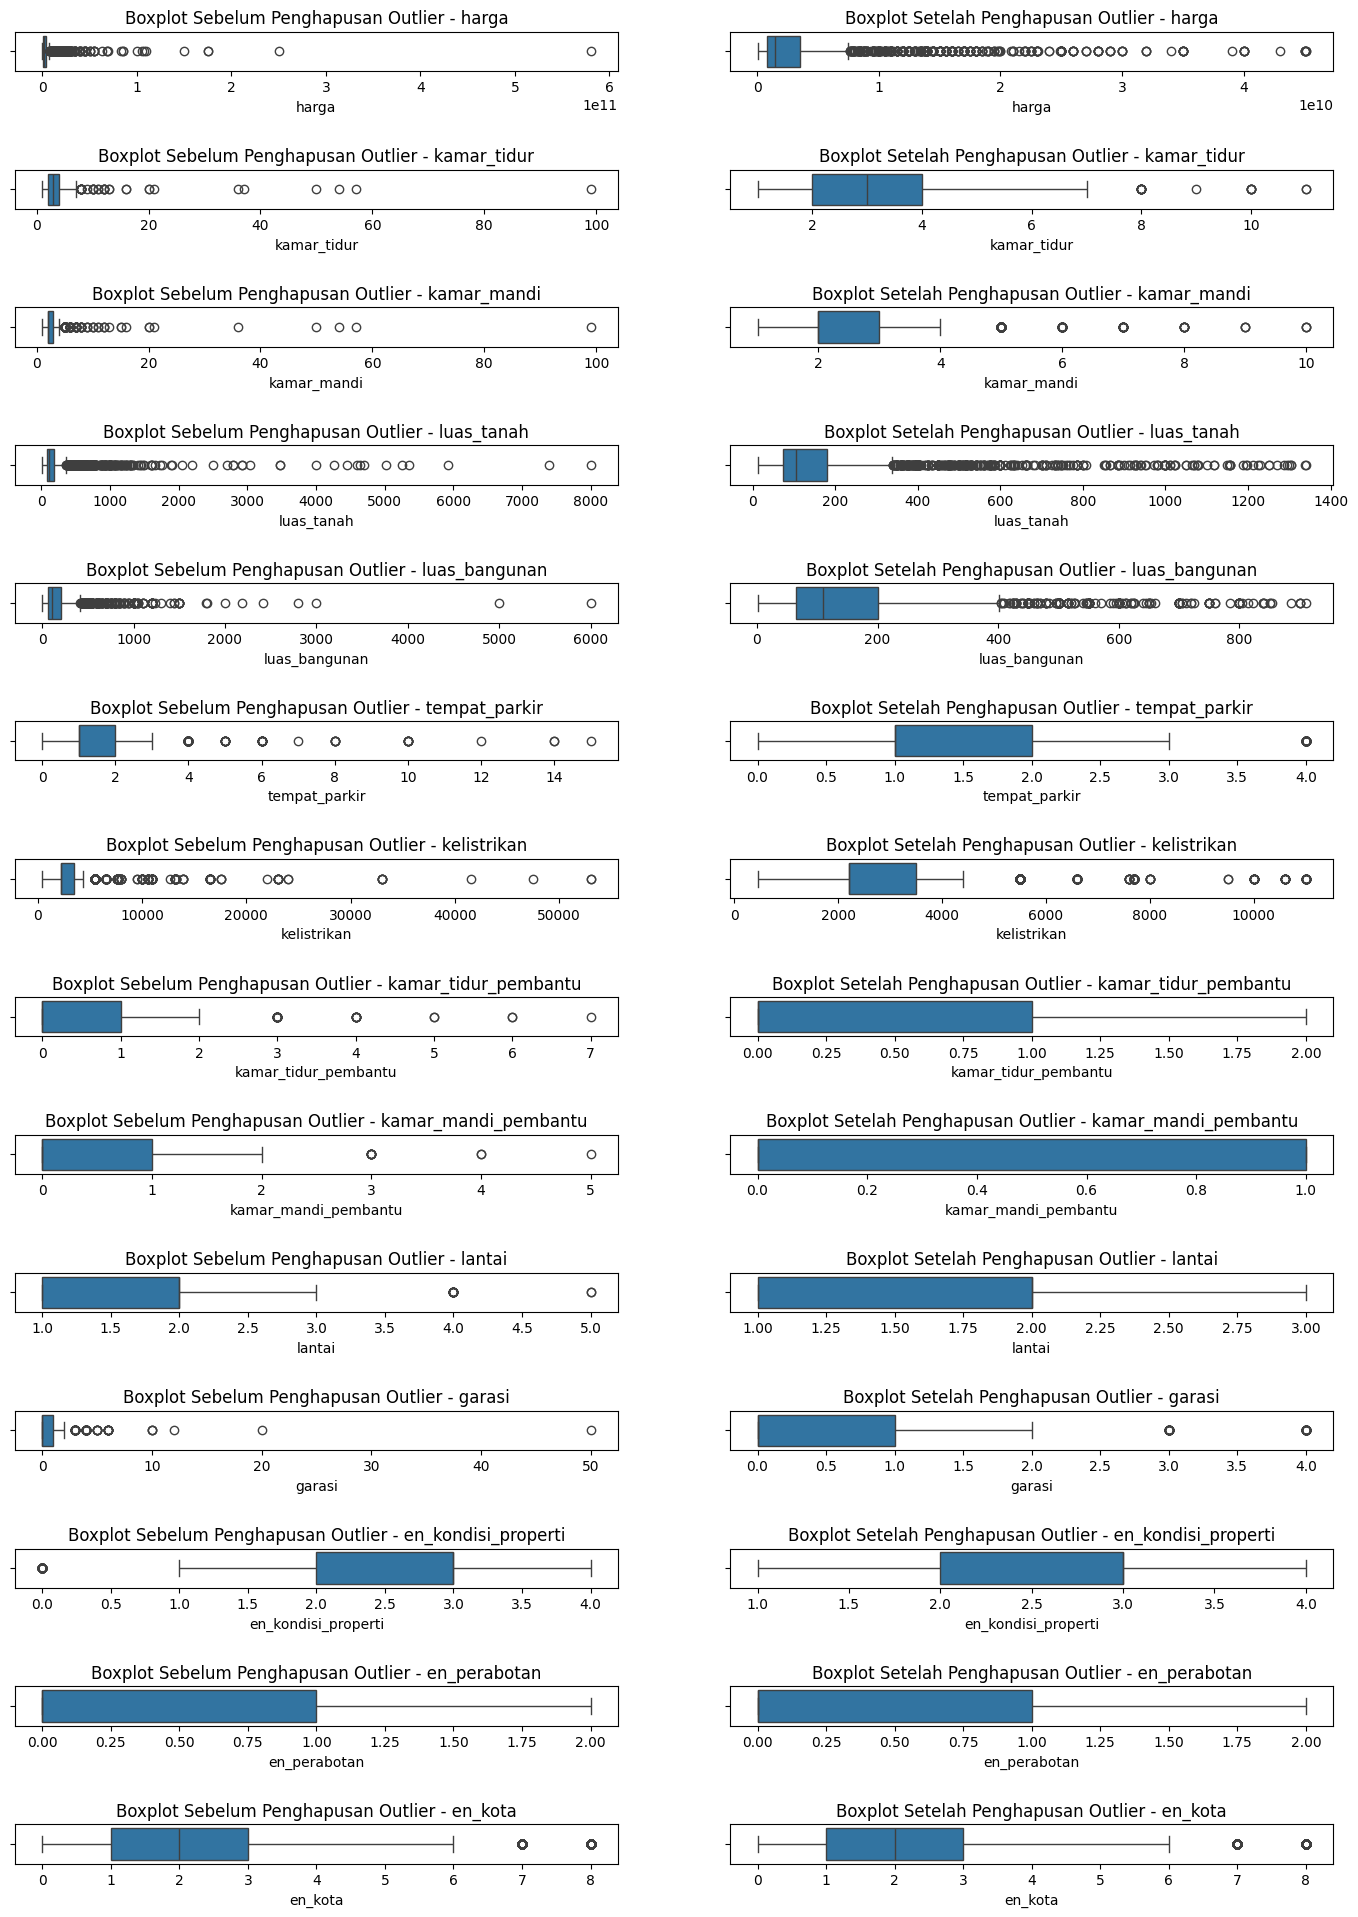

In [63]:
# Fungsi deteksi outlier dengan Z-Score
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    outlier_indices = np.where(z_scores > threshold)[0]
    cleaned_data = data[~np.isin(np.arange(data.shape[0]), outlier_indices)]
    return cleaned_data

# Contoh penggunaan
# (Pastikan DataFrame oke_train telah didefinisikan sebelumnya)

# Daftar semua kolom yang memiliki tipe data numerik
numeric_columns = oke_train.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi subplots untuk boxplot
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(15, 20))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numeric_columns):
    data = oke_train[column]

    # Boxplot sebelum penghapusan outlier
    sns.boxplot(x=data, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot Sebelum Penghapusan Outlier - {column}')

    # Hapus outlier dengan Z-Score
    cleaned_dataset = remove_outliers_zscore(data)

    # Boxplot setelah penghapusan outlier
    sns.boxplot(x=cleaned_dataset, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot Setelah Penghapusan Outlier - {column}')

    # Simpan data bersih ke dalam DataFrame
    oke_train[column] = cleaned_dataset.copy()

# Tampilkan hasil
plt.show()

# Tampilkan DataFrame setelah penghapusan outlier
#print("DataFrame Setelah Penghapusan Outlier:\n", oke_train)

In [64]:
encode_col.columns

Index(['harga', 'kota', 'kamar_tidur', 'kamar_mandi', 'luas_tanah',
       'luas_bangunan', 'tempat_parkir', 'kelistrikan', 'kamar_tidur_pembantu',
       'kamar_mandi_pembantu', 'lantai', 'kondisi_properti', 'garasi',
       'perabotan', 'en_kondisi_properti', 'en_perabotan', 'en_kota'],
      dtype='object')

In [65]:
summarize_features(oke_train)

,index,dtypes,missing,Uniques
0,harga,float64,23,641
1,kamar_tidur,float64,18,11
2,kamar_mandi,float64,17,10
3,luas_tanah,float64,37,447
4,luas_bangunan,float64,58,334
5,tempat_parkir,float64,40,5
6,kelistrikan,float64,67,16
7,kamar_tidur_pembantu,float64,40,3
8,kamar_mandi_pembantu,float64,61,2
9,lantai,float64,20,3


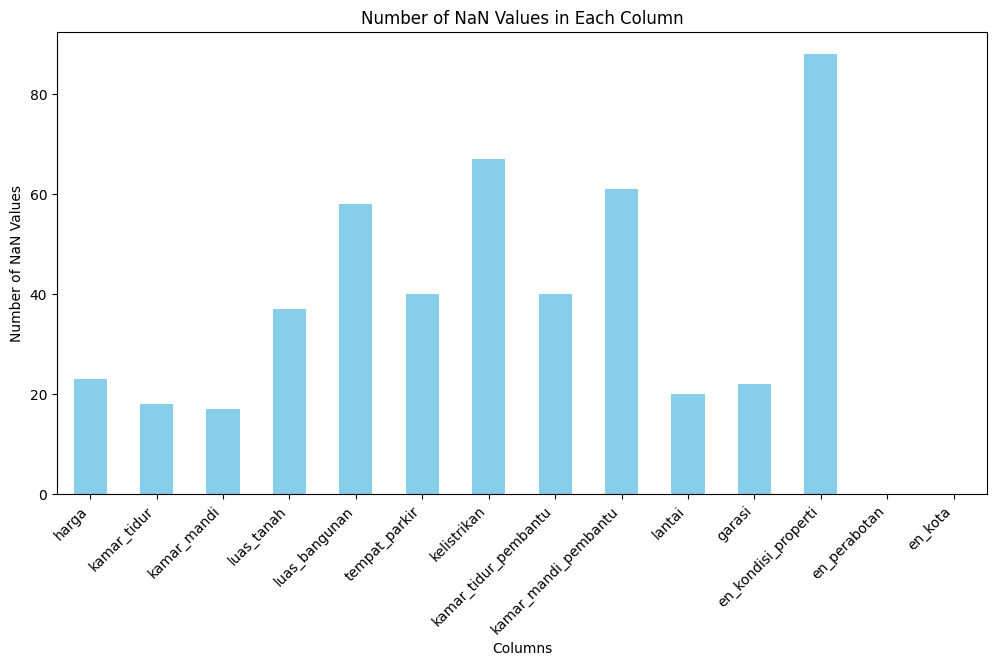

In [66]:
# Count the number of NaN values in each column
nan_counts = oke_train.isnull().sum()

# Plot the number of NaN values for each column
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: >

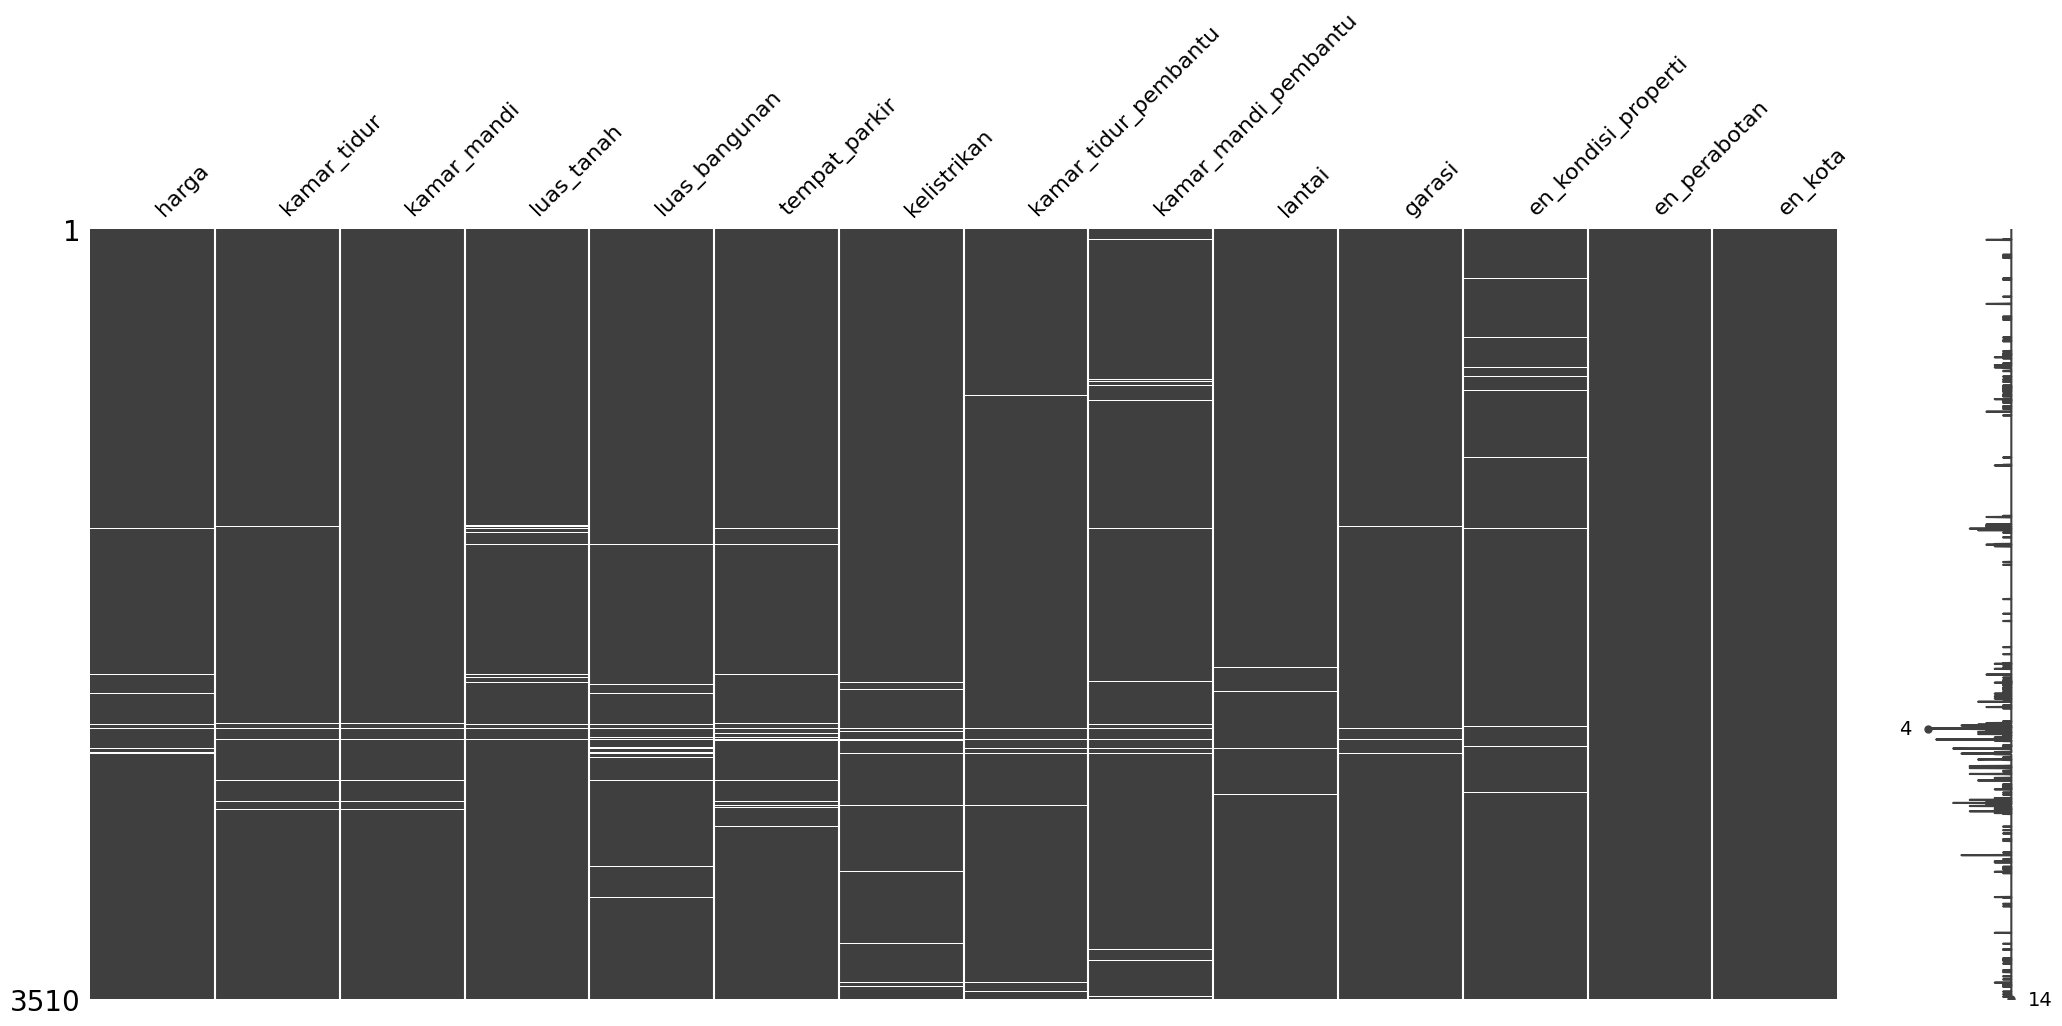

In [67]:
missingno.matrix(oke_train)

In [68]:
oke_train = oke_train.interpolate(method='linear')

In [69]:
#oke_train = oke_train.dropna()
oke_train.reset_index(drop = True, inplace = True)

In [70]:
summarize_features(oke_train)

,index,dtypes,missing,Uniques
0,harga,float64,0,658
1,kamar_tidur,float64,0,15
2,kamar_mandi,float64,0,15
3,luas_tanah,float64,0,474
4,luas_bangunan,float64,0,369
5,tempat_parkir,float64,0,13
6,kelistrikan,float64,0,46
7,kamar_tidur_pembantu,float64,0,11
8,kamar_mandi_pembantu,float64,0,7
9,lantai,float64,0,5


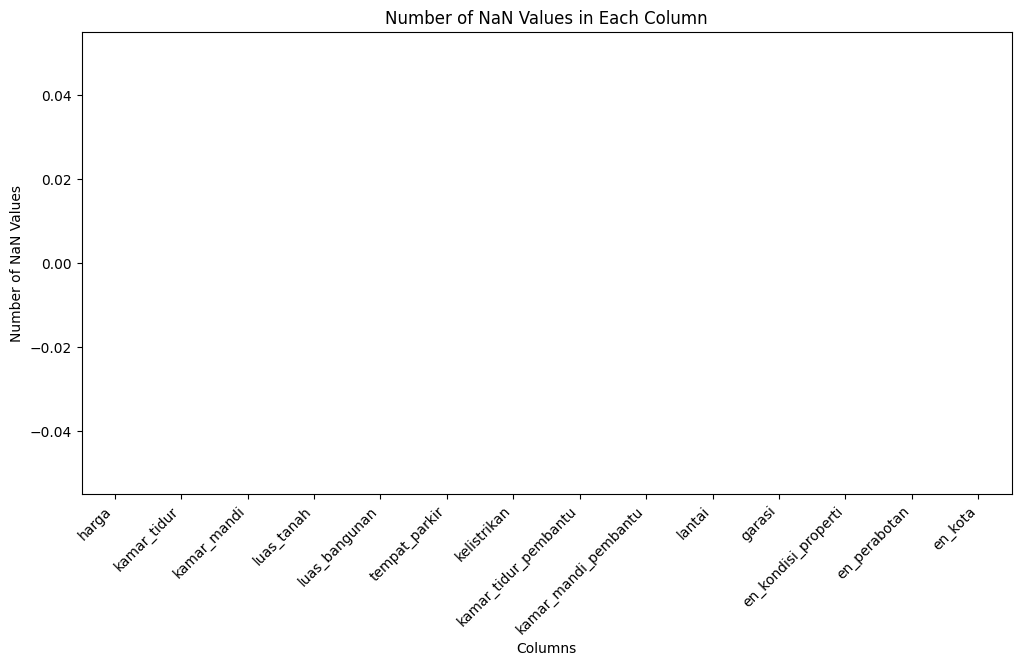

In [71]:
# Count the number of NaN values in each column
nan_counts = oke_train.isnull().sum()

# Plot the number of NaN values for each column
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.xticks(rotation=45, ha='right')
plt.show()

In [72]:
oke_train

,harga,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,tempat_parkir,kelistrikan,kamar_tidur_pembantu,kamar_mandi_pembantu,lantai,garasi,en_kondisi_properti,en_perabotan,en_kota
0,2.990000e+09,4.0,4.0,239.0,272.0,0.0,4400.0,0.0,1.0,2.0,0.0,3.0,0,0
1,1.270000e+09,3.0,2.0,55.0,69.0,1.0,2200.0,0.0,0.0,2.0,0.0,3.0,0,0
2,1.950000e+09,3.0,3.0,119.0,131.0,1.0,2200.0,1.0,1.0,2.0,1.0,3.0,0,0
3,3.300000e+09,3.0,3.0,180.0,174.0,0.0,3500.0,1.0,1.0,2.0,2.0,4.0,0,0
4,4.500000e+09,4.0,3.0,328.0,196.0,2.0,3500.0,1.0,1.0,2.0,1.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,5.880000e+08,2.0,1.0,72.0,36.0,1.0,1300.0,0.0,0.0,1.0,1.0,2.0,2,3
3506,7.850000e+08,3.0,2.0,85.0,60.0,1.0,1300.0,0.0,0.0,2.0,0.0,2.0,0,3
3507,7.550000e+08,3.0,2.0,78.0,60.0,1.0,1300.0,0.0,0.0,2.0,0.0,2.0,0,3
3508,8.000000e+08,3.0,2.0,60.0,65.0,2.0,2200.0,0.0,0.0,2.0,0.0,2.0,2,3


In [73]:
oke_train.shape

(3510, 14)

In [74]:
oke_train.reset_index(drop = True, inplace = True)

### Features Scalling

In [75]:
"""sc = MinMaxScaler()
oke_train.iloc[:, 1: ] = sc.fit_transform(oke_train.iloc[:, 1:])
after_scalling = oke_train.iloc[:, 1: ].copy()
after_scalling"""

'sc = MinMaxScaler()\noke_train.iloc[:, 1: ] = sc.fit_transform(oke_train.iloc[:, 1:])\nafter_scalling = oke_train.iloc[:, 1: ].copy()\nafter_scalling'

In [76]:
oke_train.describe()

,harga,kamar_tidur,kamar_mandi,luas_tanah,luas_bangunan,tempat_parkir,kelistrikan,kamar_tidur_pembantu,kamar_mandi_pembantu,lantai,garasi,en_kondisi_properti,en_perabotan,en_kota
count,3.510000e+03,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.00000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000
mean,3.539709e+09,3.200142,2.502707,172.860256,168.202422,1.130057,2795.641026,0.47094,0.345157,1.756695,0.662536,2.592165,0.371510,2.608832
std,5.598037e+09,1.108428,1.229210,182.653084,153.559892,0.825954,1764.237672,0.59789,0.473811,0.610938,0.842638,0.693483,0.607625,2.353119
min,4.200000e+07,1.000000,1.000000,12.000000,1.000000,0.000000,450.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000e+08,2.000000,2.000000,75.000000,66.000000,1.000000,2200.000000,0.00000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
50%,1.500000e+09,3.000000,2.000000,106.000000,110.000000,1.000000,2200.000000,0.00000,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000
75%,3.500000e+09,4.000000,3.000000,182.000000,200.000000,2.000000,3500.000000,1.00000,1.000000,2.000000,1.000000,3.000000,1.000000,3.000000
max,4.510000e+10,11.000000,10.000000,1340.000000,910.000000,4.000000,11000.000000,2.00000,1.000000,3.000000,4.000000,4.000000,2.000000,8.000000


In [77]:
"""oke_train.iloc[:, 1: ]
before_scalling = pd.DataFrame(oke_train.iloc[:, 1: ])
before_scalling"""

'oke_train.iloc[:, 1: ]\nbefore_scalling = pd.DataFrame(oke_train.iloc[:, 1: ])\nbefore_scalling'

### Normal Distribution

C:\Users\gayung\AppData\Local\Temp\ipykernel_5676\2726894639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(oke_train['harga'])


<Axes: xlabel='harga', ylabel='Density'>

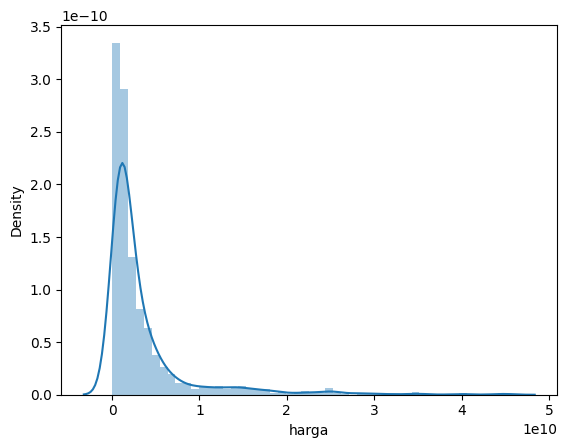

In [78]:
sns.distplot(oke_train['harga'])

### Target Engineering ( Menyeimbangkan sebaran data )

C:\Users\gayung\AppData\Local\Temp\ipykernel_5676\2899340469.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(oke_train["harga"])


<Axes: xlabel='harga', ylabel='Density'>

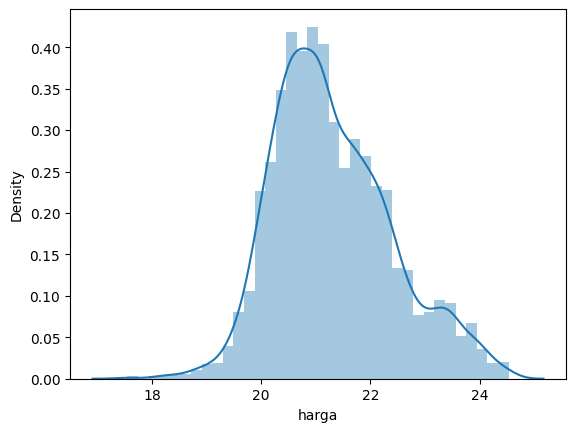

In [79]:
oke_train["harga"] = np.log(oke_train["harga"])
sns.distplot(oke_train["harga"])

### Korelasion Pearson

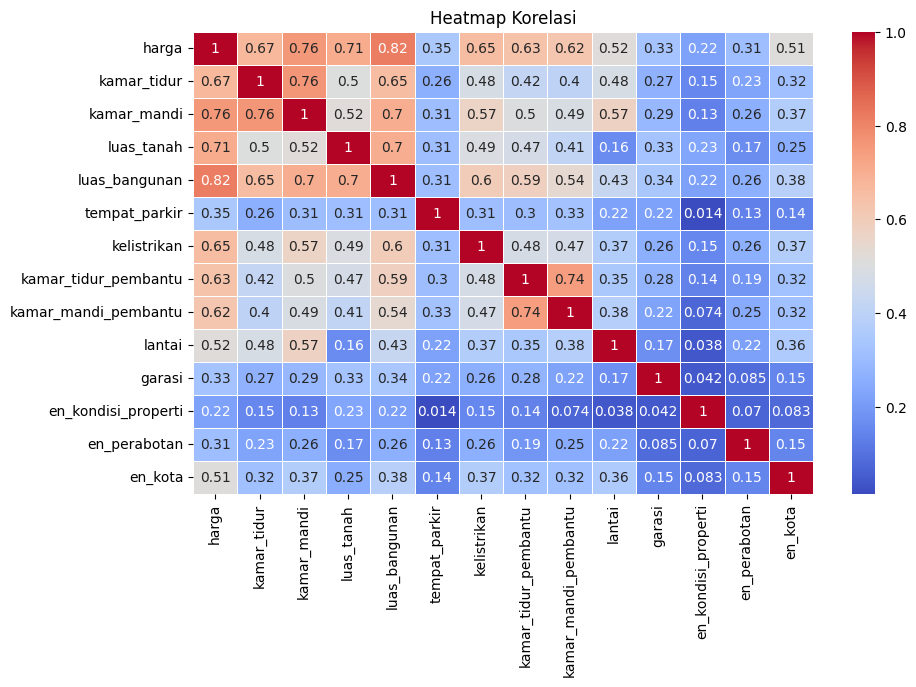

In [80]:
corr_matrix = oke_train.corr()

# Membuat heatmap menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.savefig('heatmap_korelasi.png', dpi=300, bbox_inches='tight')
plt.show()

### Features selections

In [81]:
selection = oke_train[['harga','en_kota','kamar_tidur','kamar_mandi','luas_tanah','luas_bangunan',
                'kelistrikan','kamar_tidur_pembantu','kamar_mandi_pembantu','lantai']]

#selection = oke_train.copy()
#selection.to_csv('selection.csv', index=False)

In [82]:
selection.shape

(3510, 10)

In [83]:
summarize_features(selection)

,index,dtypes,missing,Uniques
0,harga,float64,0,658
1,en_kota,int64,0,9
2,kamar_tidur,float64,0,15
3,kamar_mandi,float64,0,15
4,luas_tanah,float64,0,474
5,luas_bangunan,float64,0,369
6,kelistrikan,float64,0,46
7,kamar_tidur_pembantu,float64,0,11
8,kamar_mandi_pembantu,float64,0,7
9,lantai,float64,0,5


## Modelling

In [84]:
X = selection.drop(columns=('harga')).values
y = selection['harga'].values

### Spliting Data Train and Data Testing

In [85]:
# splitting data train and data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Random Forest

In [86]:
# Inisialisasi model Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state = 42) # default 
"""
default :
n_estimators : default = 100
max_depth: Kedalaman maksimum pohon. Default adalah None (berarti pohon akan terus tumbuh sampai semua daun murni 
atau sampai semua sampel dalam node kurang dari min_samples_split
min_samples_split: Jumlah minimum sampel yang diperlukan untuk membagi node. Default adalah 2.
min_samples_leaf: Jumlah minimum sampel yang diperlukan untuk berada di daun node. Default adalah 1. 
"""

# Definisikan jumlah fold untuk K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True)

# Inisialisasi list untuk menyimpan skor MAE
mae_scores = []

# Inisialisasi list untuk menyimpan skor MSE
mse_scores = []

# Inisialisasi list untuk menyimpan skor MAPE
mape_scores = []

# Inisialisasi list untuk menyimpan skor RMSE
rmse_scores = []

# Lakukan K-fold cross-validation
for i, (train, test) in enumerate(kfold.split(X_train)):
    random_forest_model.fit(X_train[train], y_train[train])
    y_pred = random_forest_model.predict(X_train[test])

    # Hitung MAE
    mae = mean_absolute_error(y_train[test], y_pred)
    mae_scores.append(mae)

    # Hitung MSE
    mse = mean_squared_error(y_train[test], y_pred)
    mse_scores.append(mse)

    # Hitung MAPE
    mape = np.mean(np.abs((y_train[test] - y_pred) / y_train[test])) * 100
    mape_scores.append(mape)

    # Hitung RMSE
    rmse = math.sqrt(mse)
    rmse_scores.append(rmse)

    # Print skor untuk setiap split
    print(f"Split {i+1}: RMSE = {rmse}, MAE = {mae}, MAPE = {mape}%")

# Hitung rata-rata skor MAE, MSE, MAPE, dan RMSE
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_mape = np.mean(mape_scores)
mean_rmse = np.mean(rmse_scores)

print(f"\nMean Squared Error (K-fold cross-validation): {mean_mse}")
print(f"Root Mean Squared Error (K-fold cross-validation): {mean_rmse}")
print(f"Mean Absolute Error (K-fold cross-validation): {mean_mae}")
print(f"Mean Absolute Percentage Error (K-fold cross-validation): {mean_mape}%")


Split 1: RMSE = 0.3897315511651464, MAE = 0.22959422679573993, MAPE = 1.0758470384903662%
Split 2: RMSE = 0.3505078995456736, MAE = 0.20702486332579056, MAPE = 0.9606015432543571%
Split 3: RMSE = 0.3621524302858563, MAE = 0.23704153934577296, MAPE = 1.0970686065694375%
Split 4: RMSE = 0.30516512574388227, MAE = 0.19664046118014958, MAPE = 0.9150209568251567%
Split 5: RMSE = 0.38245397988398966, MAE = 0.22264937309582097, MAPE = 1.0557764415202027%
Split 6: RMSE = 0.32408406383369587, MAE = 0.2026258883434034, MAPE = 0.9502678048512095%
Split 7: RMSE = 0.3305726647417908, MAE = 0.214313688791105, MAPE = 0.9933178667585578%
Split 8: RMSE = 0.3367469824547101, MAE = 0.2106174875923143, MAPE = 0.9869850732741504%
Split 9: RMSE = 0.31521564059037566, MAE = 0.18569597013480446, MAPE = 0.8704371989743279%
Split 10: RMSE = 0.27749989141189124, MAE = 0.1716384718168735, MAPE = 0.8013667313775296%

Mean Squared Error (K-fold cross-validation): 0.11493720401830625
Root Mean Squared Error (K-fold 

In [87]:
# copy untuk visualisasi 
fmean_mae = np.mean(mae_scores)
fmean_mse = np.mean(mse_scores)
fmean_mape = np.mean(mape_scores)
fmean_rmse = np.mean(rmse_scores)

In [88]:
# Inisialisasi model XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # default 

"""
default : 
n_estimator : 100
colsample_bytree= 1, 
learning_rate(eta) = 0.3 ,
max_depth= 6, 
subsample = 1,
reg_alpha= 0
reg_lambda = 1
"""

# Definisikan jumlah fold untuk K-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi list untuk menyimpan skor MAE
mae_scores = []

# Inisialisasi list untuk menyimpan skor MSE
mse_scores = []

# Inisialisasi list untuk menyimpan skor MAPE
mape_scores = []

# Lakukan K-fold cross-validation
for i, (train, test) in enumerate(kfold.split(X_train)):
    xg_reg.fit(X_train[train], y_train[train])
    y_pred = xg_reg.predict(X_train[test])

    # Hitung MAE
    mae = mean_absolute_error(y_train[test], y_pred)
    mae_scores.append(mae)

    # Hitung MSE
    mse = mean_squared_error(y_train[test], y_pred)
    mse_scores.append(mse)

    # Hitung MAPE
    mape = np.mean(np.abs((y_train[test] - y_pred) / y_train[test])) * 100
    mape_scores.append(mape)

    # Hitung RMSE
    rmse = math.sqrt(mse)

    # Print skor untuk setiap split
    print(f"Split {i+1}: RMSE = {rmse}, MAE = {mae}, MAPE = {mape}%")

# Hitung rata-rata skor MAE, MSE, MAPE, dan RMSE
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_mape = np.mean(mape_scores)
mean_rmse = math.sqrt(mean_mse)

print(f"\nMean Squared Error (K-fold cross-validation): {mean_mse}")
print(f"Root Mean Squared Error (K-fold cross-validation): {mean_rmse}")
print(f"Mean Absolute Error (K-fold cross-validation): {mean_mae}")
print(f"Mean Absolute Percentage Error (K-fold cross-validation): {mean_mape}%")

Split 1: RMSE = 0.3278112924371373, MAE = 0.2183118888328603, MAPE = 1.0181678406903063%
Split 2: RMSE = 0.36585287683507595, MAE = 0.22006192914088352, MAPE = 1.0337601289254001%
Split 3: RMSE = 0.34064732187209185, MAE = 0.22268987111097283, MAPE = 1.0472392747841393%
Split 4: RMSE = 0.2801421104213032, MAE = 0.1990454009870656, MAPE = 0.9336115693775283%
Split 5: RMSE = 0.3210679352151181, MAE = 0.21997371774765495, MAPE = 1.031924857971311%
Split 6: RMSE = 0.2856423117537802, MAE = 0.19761481822942017, MAPE = 0.9213885525632312%
Split 7: RMSE = 0.3029843547446808, MAE = 0.2014554590927655, MAPE = 0.936295987962521%
Split 8: RMSE = 0.33075930477256976, MAE = 0.21746602169236987, MAPE = 1.0100656866899544%
Split 9: RMSE = 0.3772264126639318, MAE = 0.24349452129652868, MAPE = 1.1450061652418457%
Split 10: RMSE = 0.38351197259491665, MAE = 0.2405074152716402, MAPE = 1.129529630253904%

Mean Squared Error (K-fold cross-validation): 0.11110873566037083
Root Mean Squared Error (K-fold cro

In [89]:
xmean_mae = np.mean(mae_scores)
xmean_mse = np.mean(mse_scores)
xmean_mape = np.mean(mape_scores)
xmean_rmse = math.sqrt(mean_mse)

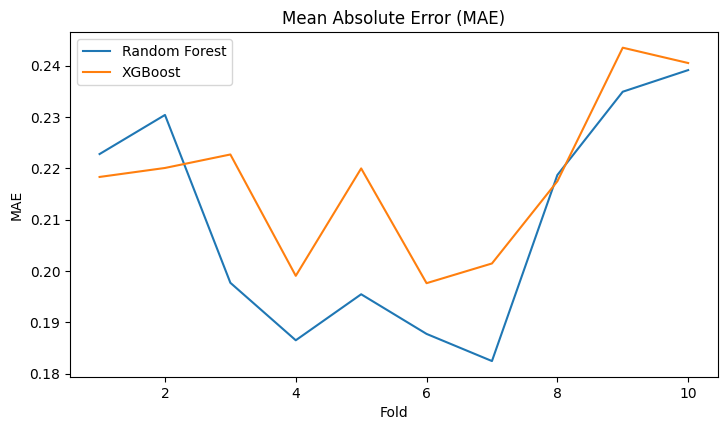

In [90]:
# Fungsi untuk melakukan K-fold cross-validation dan mengembalikan skor
def cross_validation(model, X, y, k=10):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    mae_scores, mse_scores, mape_scores, rmse_scores = [], [], [], []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        rmse = math.sqrt(mse)

        mae_scores.append(mae)
        mse_scores.append(mse)
        mape_scores.append(mape)
        rmse_scores.append(rmse)

    return mae_scores, mse_scores, mape_scores, rmse_scores

# Inisialisasi model Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Lakukan cross-validation untuk Random Forest
rf_mae_scores, rf_mse_scores, rf_mape_scores, rf_rmse_scores = cross_validation(random_forest_model, X_train, y_train)

# Inisialisasi model XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',random_state=42)

# Lakukan cross-validation untuk XGBoost
xg_mae_scores, xg_mse_scores, xg_mape_scores, xg_rmse_scores = cross_validation(xg_reg, X_train, y_train)

# Visualisasi hasil cross-validation
folds = range(1, 11)

# MAE
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(folds, rf_mae_scores, label='Random Forest')
plt.plot(folds, xg_mae_scores, label='XGBoost')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()


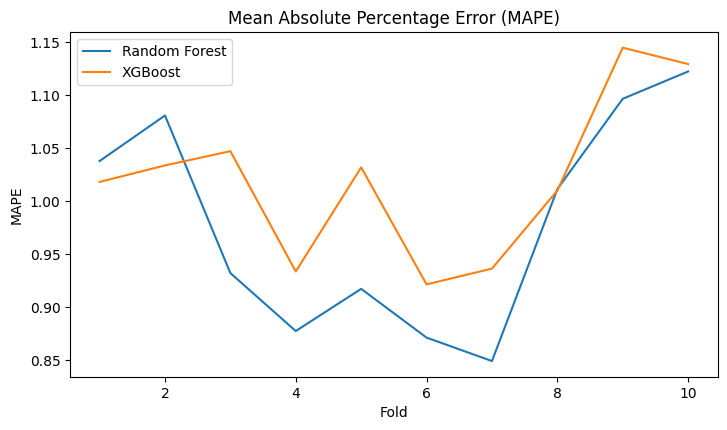

In [91]:
# MAPE
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 3)
plt.plot(folds, rf_mape_scores, label='Random Forest')
plt.plot(folds, xg_mape_scores, label='XGBoost')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Fold')
plt.ylabel('MAPE')
plt.legend()

plt.tight_layout()
plt.show()



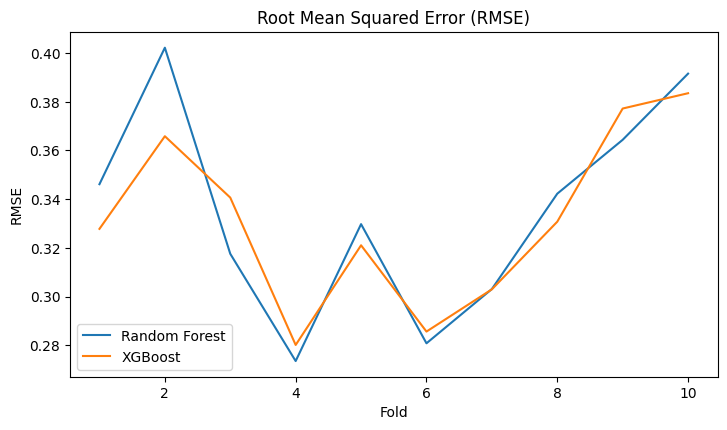

In [92]:
# RMSE 
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 4)
plt.plot(folds, rf_rmse_scores, label='Random Forest')
plt.plot(folds, xg_rmse_scores, label='XGBoost')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

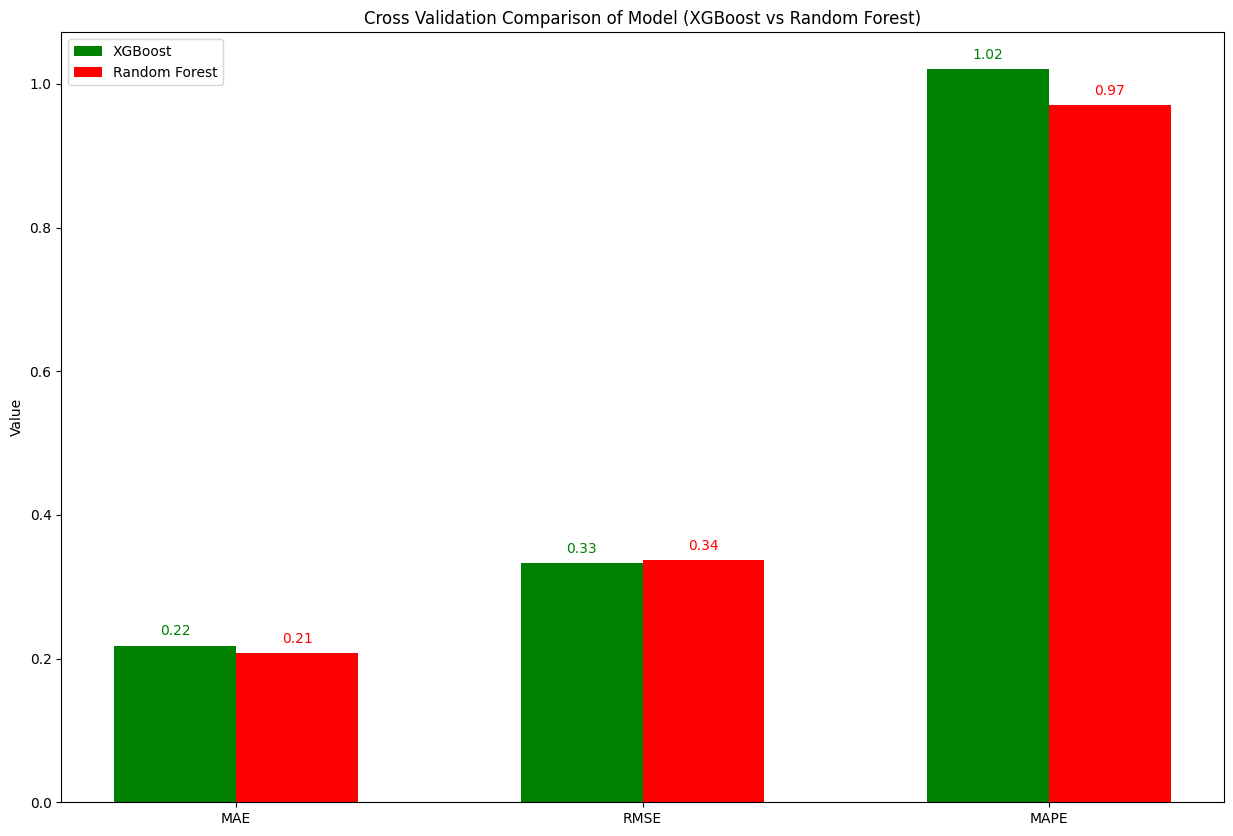

In [93]:
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_mape = np.mean(mape_scores)
mean_rmse = math.sqrt(mean_mse)
# Data
data = {
    'index': ['MAE', 'RMSE', 'MAPE'],
    'XGBoost': [xmean_mae, xmean_rmse, xmean_mape],  
    'Random Forest': [fmean_mae, fmean_rmse, fmean_mape]  
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

bar_width = 0.3
bar_positions_xgb = np.arange(len(df['index']))
bar_positions_rf = bar_positions_xgb + bar_width

# Bars for XGBoost
ax.bar(bar_positions_xgb, df['XGBoost'], width=bar_width, color='green', label='XGBoost')

# Bars for Random Forest
ax.bar(bar_positions_rf, df['Random Forest'], width=bar_width, color='red', label='Random Forest')

# Adding data values on top of bars
for xpos, data_values_xgb, data_values_rf in zip(bar_positions_xgb, df['XGBoost'], df['Random Forest']):
    ax.text(xpos, data_values_xgb + 0.01, f'{data_values_xgb:.2f}', ha='center', va='bottom', color='green')
    ax.text(xpos + bar_width, data_values_rf + 0.01, f'{data_values_rf:.2f}', ha='center', va='bottom', color='red')

# Adding labels and title
ax.set_xticks(bar_positions_xgb + bar_width / 2)  # Adjusted to center bars
ax.set_xticklabels(df['index'])
ax.set_ylabel('Value')
ax.set_title('Cross Validation Comparison of Model (XGBoost vs Random Forest)')
ax.legend()

# Displaying the plot
plt.show()


#Uji (test)

#Random Forest

In [94]:
forest_test = y_test.copy()

# Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Measure the time taken for training the model
start_train_time = time.time()
random_forest_model.fit(X_train, y_train)
end_train_time = time.time()

# Calculate the time taken for training
ftrain_time_taken = end_train_time - start_train_time
print(f'Time taken for training: {ftrain_time_taken:.4f} seconds')

# Measure the time taken for prediction
start_pred_time = time.time()
forest_predict = random_forest_model.predict(X_test)
end_pred_time = time.time()

# Calculate the time taken for prediction
ftime_taken = end_pred_time - start_pred_time
print(f'Time taken for prediction: {ftime_taken:.4f} seconds')

# Evaluate the model
fmse = mean_squared_error(forest_test, forest_predict)
print(f'Mean Squared Error: {fmse}')

# Calculate Root Mean Squared Error (RMSE)
frmse = np.sqrt(fmse)
print(f'Root Mean Squared Error: {frmse}')

# Calculate Mean Absolute Error (MAE)
fmae = mean_absolute_error(forest_test, forest_predict)
print(f'Mean Absolute Error: {fmae}')

# Calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

fmape = calculate_mape(forest_test, forest_predict)
print(f'MAPE: {fmape:.2f}%')


Time taken for training: 4.7570 seconds
Time taken for prediction: 0.0650 seconds
Mean Squared Error: 0.11196549881969105
Root Mean Squared Error: 0.33461246064617955
Mean Absolute Error: 0.19607932645760928
MAPE: 0.92%


In [95]:
# perbandingan hasil prediksi dan data asli
compare = np.concatenate((np.exp(forest_predict).reshape(len(forest_predict), 1), np.exp(y_test).reshape(len(y_test), 1)), 1)
# Membuat DataFrame dari array NumPy
compare_df = pd.DataFrame(compare, columns=['Predicted', 'Actual'])
compare_head = compare_df.copy()
compare_head.to_excel('resultrf.xlsx',index = False)
compare_head

,Predicted,Actual
0,1.013151e+09,1.020000e+09
1,1.940431e+09,2.190000e+09
2,3.830000e+09,3.830000e+09
3,8.124389e+08,6.500000e+08
4,4.467623e+08,5.990000e+08
...,...,...
697,2.801231e+09,2.400000e+09
698,3.201394e+09,3.150000e+09
699,7.725084e+08,8.000000e+08
700,7.636746e+08,3.800000e+08


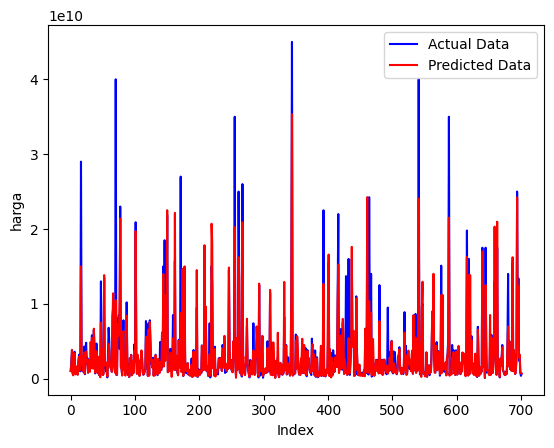

In [96]:
# Visualisasi scatter plot
plt.plot(compare_head.index, compare_head['Actual'], color='blue', label='Actual Data')
plt.plot(compare_head.index, compare_head['Predicted'], color='red', label='Predicted Data')

# Beri label pada sumbu x dan y
plt.xlabel('Index')
plt.ylabel('harga')

# Tambahkan legenda
plt.legend()

# Tampilkan plot
plt.show()

## XGBoost

In [97]:
# Define the model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state = 42)

# Fit the model

# Measure the time taken for training the model
start_train_time = time.time()
xg_reg.fit(X_train, y_train)
end_train_time = time.time()

# Calculate the time taken for training
xtrain_time_taken = end_train_time - start_train_time
print(f'Time taken for training: {xtrain_time_taken:.4f} seconds')

# Measure the time taken for prediction
start_time = time.time()
predictions = xg_reg.predict(X_test)
end_time = time.time()

# Calculate the time taken
xtime_taken = end_time - start_time
print(f'Time taken for prediction: {xtime_taken:.4f} seconds')

# Evaluate the model
xmse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {xmse}')

# Calculate Root Mean Squared Error (RMSE)
xrmse = math.sqrt(xmse)
print(f'Root Mean Squared Error: {xrmse}')

# Calculate Mean Absolute Error (MAE)
xmae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {xmae}')

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

xmape = calculate_mape(y_test, predictions)
print(f'MAPE: {xmape:.2f}%')


Time taken for training: 0.9052 seconds
Time taken for prediction: 0.0060 seconds
Mean Squared Error: 0.11645742934878338
Root Mean Squared Error: 0.34125859600716785
Mean Absolute Error: 0.2121040510684727
MAPE: 0.99%


In [98]:
# perbandingan hasil prediksi dan data asli
compare = np.concatenate((np.exp(predictions).reshape(len(predictions), 1), np.exp(y_test).reshape(len(y_test), 1)), 1)
# Membuat DataFrame dari array NumPy
compare_df = pd.DataFrame(compare, columns=['Predicted', 'Actual'])
compare_head = compare_df.copy()
compare_head.to_excel('resultxgb.xlsx',index = False)

compare_head

,Predicted,Actual
0,9.781185e+08,1.020000e+09
1,2.068107e+09,2.190000e+09
2,3.849286e+09,3.830000e+09
3,8.802668e+08,6.500000e+08
4,3.983499e+08,5.990000e+08
...,...,...
697,2.428835e+09,2.400000e+09
698,3.270500e+09,3.150000e+09
699,6.928111e+08,8.000000e+08
700,6.139231e+08,3.800000e+08


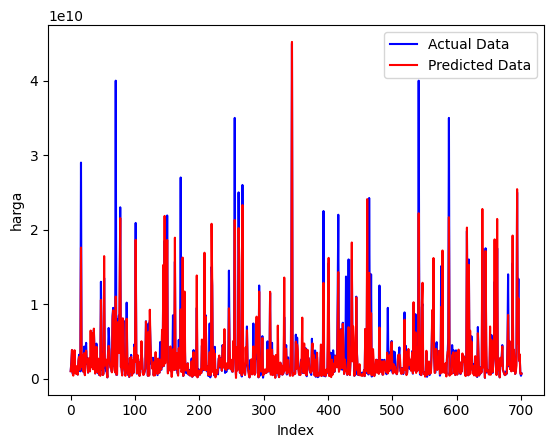

In [99]:
# Visualisasi scatter plot
plt.plot(compare_head.index, compare_head['Actual'], color='blue', label='Actual Data')
plt.plot(compare_head.index, compare_head['Predicted'], color='red', label='Predicted Data')

# Beri label pada sumbu x dan y
plt.xlabel('Index')
plt.ylabel('harga')

# Tambahkan legenda
plt.legend()

# Tampilkan plot
plt.show()

In [100]:
data = {
    'Model': ['XGBoost','Random Forest '],
    'MSE': [ xmse, fmse],
    'RMSE': [xrmse,frmse ],
    'MAE' : [xmae,fmae],
    'MAPE': [xmape,fmape],
}
# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menampilkan tabel perbandingan
print(df.sort_values('MAE'))

            Model       MSE      RMSE       MAE     MAPE
1  Random Forest   0.111965  0.334612  0.196079  0.91825
0         XGBoost  0.116457  0.341259  0.212104  0.99344


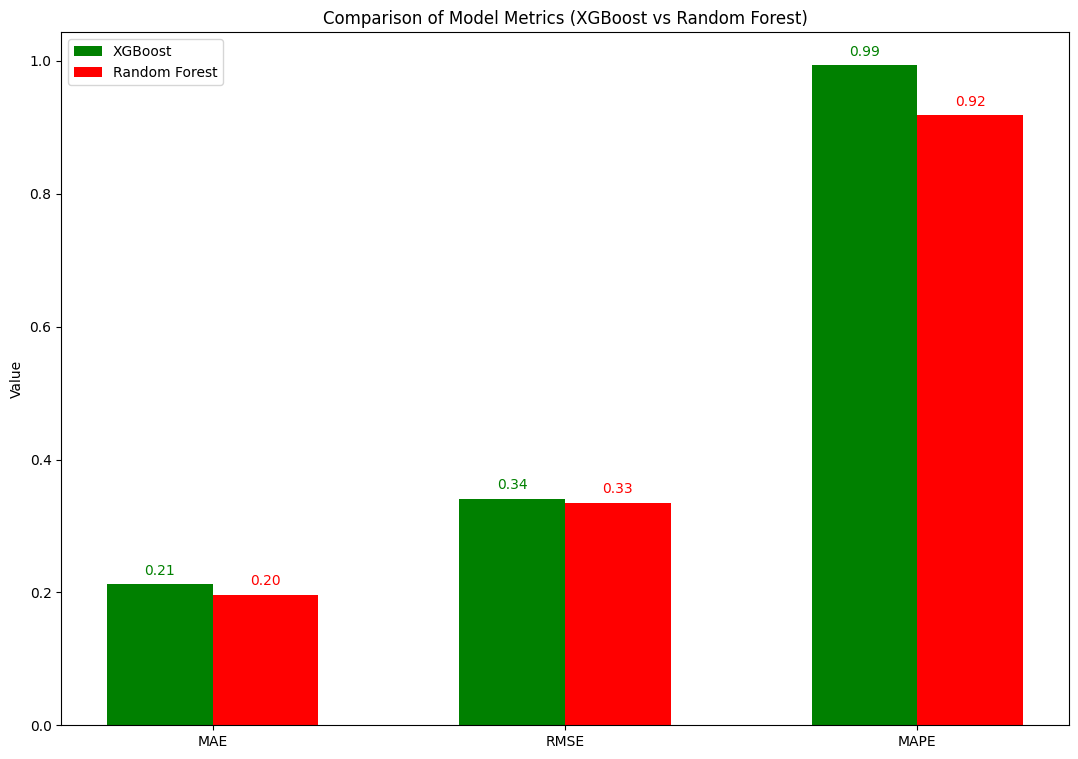

In [101]:
# Data
data = {
    'Error Metrics': ['MAE', 'RMSE', 'MAPE'],
    'XGBoost': [xmae, xrmse, xmape],  # Change xtime_taken to time_taken
    'Random Forest': [fmae, frmse, fmape]  # Change ftime_taken to pred_time_taken
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(13, 9))

bar_width = 0.3
bar_positions_xgb = np.arange(len(df['Error Metrics']))
bar_positions_rf = bar_positions_xgb + bar_width

# Bars for XGBoost
ax.bar(bar_positions_xgb, df['XGBoost'], width=bar_width, color='green', label='XGBoost')

# Bars for Random Forest
ax.bar(bar_positions_rf, df['Random Forest'], width=bar_width, color='red', label='Random Forest')

# Adding data values on top of bars
for xpos, data_values_xgb, data_values_rf in zip(bar_positions_xgb, df['XGBoost'], df['Random Forest']):
    ax.text(xpos, data_values_xgb + 0.01, f'{data_values_xgb:.2f}', ha='center', va='bottom', color='green')
    ax.text(xpos + bar_width, data_values_rf + 0.01, f'{data_values_rf:.2f}', ha='center', va='bottom', color='red')

# Adding labels and title
ax.set_xticks(bar_positions_xgb + bar_width / 2)  # Adjusted to center bars
ax.set_xticklabels(df['Error Metrics'])
ax.set_ylabel('Value')
ax.set_title('Comparison of Model Metrics (XGBoost vs Random Forest)')
ax.legend()

# Displaying the plot
plt.show()


In [102]:
data = {
    'Model': ['XGBoost','Random Forest '],
    'Latih' : [xtrain_time_taken,ftrain_time_taken],
    'Uji' :[xtime_taken,ftime_taken]

}
# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menampilkan tabel perbandingan
print(df.sort_values('Latih'))

            Model     Latih       Uji
0         XGBoost  0.905202  0.005996
1  Random Forest   4.757001  0.064958


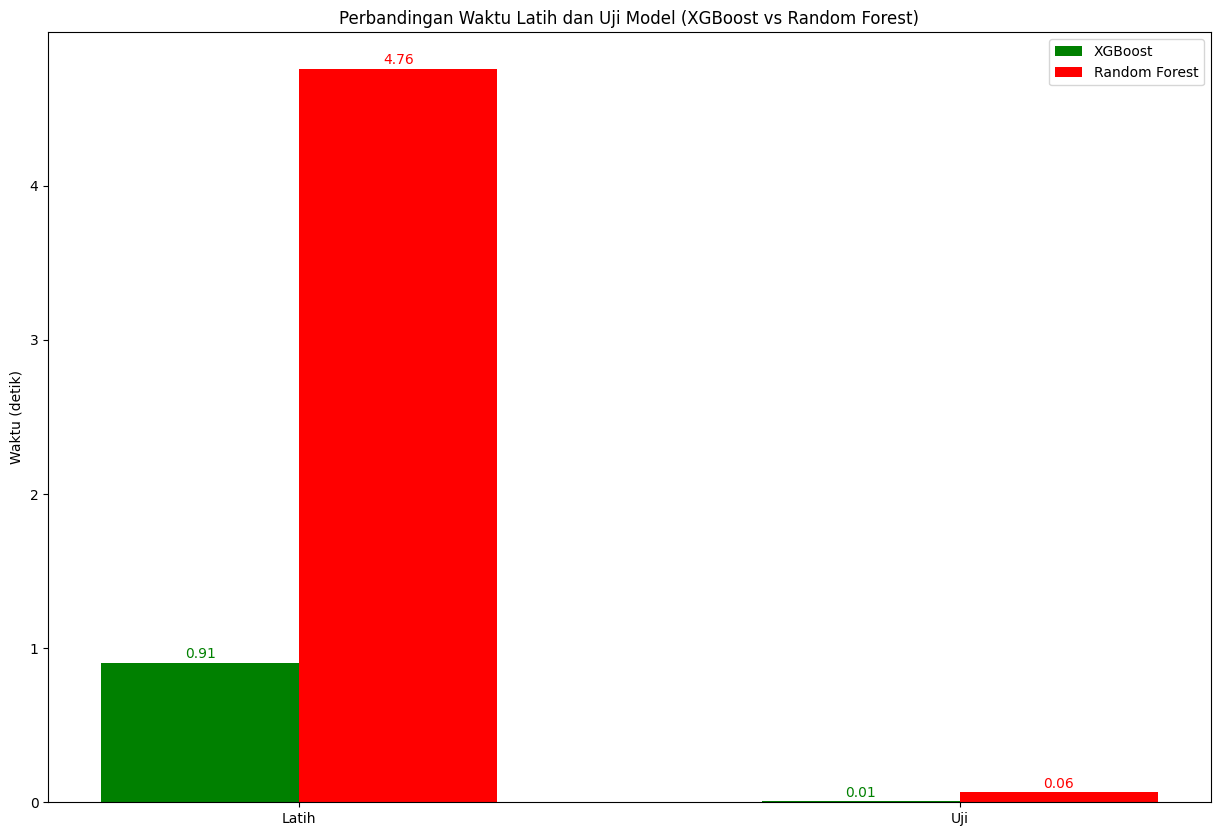

In [103]:
# Data
data = {
    'Kecepatan': ['Latih', 'Uji'],
    'XGBoost': [xtrain_time_taken, xtime_taken],
    'Random Forest': [ftrain_time_taken, ftime_taken]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

bar_width = 0.3
bar_positions_xgb = np.arange(len(df['Kecepatan']))
bar_positions_rf = bar_positions_xgb + bar_width

# Bars for XGBoost
ax.bar(bar_positions_xgb, df['XGBoost'], width=bar_width, color='green', label='XGBoost')

# Bars for Random Forest
ax.bar(bar_positions_rf, df['Random Forest'], width=bar_width, color='red', label='Random Forest')

# Adding data values on top of bars
for xpos, data_values_xgb, data_values_rf in zip(bar_positions_xgb, df['XGBoost'], df['Random Forest']):
    ax.text(xpos, data_values_xgb + 0.01, f'{data_values_xgb:.2f}', ha='center', va='bottom', color='green')
    ax.text(xpos + bar_width, data_values_rf + 0.01, f'{data_values_rf:.2f}', ha='center', va='bottom', color='red')

# Adding labels and title
ax.set_xticks(bar_positions_xgb + bar_width / 2)  # Adjusted to center bars
ax.set_xticklabels(df['Kecepatan'])
ax.set_ylabel('Waktu (detik)')
ax.set_title('Perbandingan Waktu Latih dan Uji Model (XGBoost vs Random Forest)')
ax.legend()

# Displaying the plot
plt.show()

In [104]:
# Simpan model ke file dengan pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)
print('Model telah disimpan ke random_forest_model.pkl')

Model telah disimpan ke random_forest_model.pkl


In [105]:
X_train.shape

(2808, 9)

In [106]:
y_train.shape

(2808,)

In [107]:
# Load the model from file using pickle
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

rumah_baru = pd.DataFrame({
    'en_kota': [0],                      
    'kamar_tidur': [3],                 
    'kamar_mandi': [1],
    'luas_tanah': [75],
    'luas_bangunan': [50],
    'kelistrikan': [1300],
    'kamar_tidur_pembantu': [0],
    'kamar_mandi_pembantu': [0],
    'lantai': [0]
})

## Make predictions using the loaded model
predictions = loaded_model.predict(rumah_baru)

# Convert predictions to exponential values
exponential_predictions = np.exp(predictions)/1000000

# Convert predictions to scientific notation
#scientific_predictions = ['{:.2e}'.format(pred) for pred in exponential_predictions]

# Print the prediction results
print("Prediksi untuk data input baru:")
print("Prediksi Harga Rumah (Dalam Juta) =", "Rp.",exponential_predictions[0],'Juta')


Prediksi untuk data input baru:
Prediksi Harga Rumah (Dalam Juta) = Rp. 565.0549766590792 Juta


C:\Users\gayung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [108]:

# Example new data for prediction (replace with your dataset)
new_data = np.array([
    [0, 3, 1, 75, 50, 1300, 0, 0, 1],
    [1, 3, 1, 75, 50, 1300, 0, 0, 1],
    [2, 3, 1, 75, 50, 1300, 0, 0, 1],
    [3, 3, 1, 75, 50, 1300, 0, 0, 1],
    [4, 3, 1, 75, 50, 1300, 0, 0, 1],
    [5, 3, 1, 75, 50, 1300, 0, 0, 1],
    [6, 3, 1, 75, 50, 1300, 0, 0, 1],
    [7, 3, 1, 75, 50, 1300, 0, 0, 1],
    [8, 3, 1, 75, 50, 1300, 0, 0, 1],
   
    
])

# Make predictions using the loaded model
predictions = loaded_model.predict(new_data)

# Convert predictions to exponential values
# This step might be unnecessary if your model is already trained on the log scale
# and predictions are already in the original scale
exponential_predictions = np.exp(predictions)/1000000

# Print the prediction results
print("Prediksi untuk data input baru:")
for i, pred in enumerate(exponential_predictions):
    print(f"Data Input {i+1}: Prediksi Harga Rumah (Dalam Juta) = Rp. {pred:.2f} Juta")


Prediksi untuk data input baru:
Data Input 1: Prediksi Harga Rumah (Dalam Juta) = Rp. 565.05 Juta
Data Input 2: Prediksi Harga Rumah (Dalam Juta) = Rp. 483.12 Juta
Data Input 3: Prediksi Harga Rumah (Dalam Juta) = Rp. 547.59 Juta
Data Input 4: Prediksi Harga Rumah (Dalam Juta) = Rp. 576.08 Juta
Data Input 5: Prediksi Harga Rumah (Dalam Juta) = Rp. 576.08 Juta
Data Input 6: Prediksi Harga Rumah (Dalam Juta) = Rp. 593.03 Juta
Data Input 7: Prediksi Harga Rumah (Dalam Juta) = Rp. 780.84 Juta
Data Input 8: Prediksi Harga Rumah (Dalam Juta) = Rp. 787.02 Juta
Data Input 9: Prediksi Harga Rumah (Dalam Juta) = Rp. 787.02 Juta


In [109]:
# Simpan model ke file dengan pickle
with open('xg_reg.pkl', 'wb') as file:
    pickle.dump(xg_reg, file)
print('Model telah disimpan ke xg_reg.pkl')


Model telah disimpan ke xg_reg.pkl


In [110]:
# Load the model from file using pickle
with open('xg_reg.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

rumah_baru = pd.DataFrame({
    'en_kota': [0],                      
    'kamar_tidur': [3],                 
    'kamar_mandi': [1],
    'luas_tanah': [75],
    'luas_bangunan': [50],
    'kelistrikan': [1300],
    'kamar_tidur_pembantu': [0],
    'kamar_mandi_pembantu': [0],
    'lantai': [0]
})

## Make predictions using the loaded model
predictions = loaded_model.predict(rumah_baru)

# Convert predictions to exponential values
exponential_predictions = np.exp(predictions)/1000000

# Convert predictions to scientific notation
#scientific_predictions = ['{:.2e}'.format(pred) for pred in exponential_predictions]

# Print the prediction results
print("Prediksi untuk data input baru:")
print("Prediksi Harga Rumah (Dalam Juta) =", "Rp.",exponential_predictions[0],'Juta')



Prediksi untuk data input baru:
Prediksi Harga Rumah (Dalam Juta) = Rp. 542.6943 Juta


In [111]:

# Example new data for prediction (replace with your dataset)
new_data = np.array([
    [0, 3, 1, 75, 50, 1300, 0, 0, 1],
    [1, 3, 1, 75, 50, 1300, 0, 0, 1],
    [2, 3, 1, 75, 50, 1300, 0, 0, 1],
    [3, 3, 1, 75, 50, 1300, 0, 0, 1],
    [4, 3, 1, 75, 50, 1300, 0, 0, 1],
    [5, 3, 1, 75, 50, 1300, 0, 0, 1],
    [6, 3, 1, 75, 50, 1300, 0, 0, 1],
    [7, 3, 1, 75, 50, 1300, 0, 0, 1],
    [8, 3, 1, 75, 50, 1300, 0, 0, 1],
   
    
])

# Make predictions using the loaded model
predictions = loaded_model.predict(new_data)

# Convert predictions to exponential values
# This step might be unnecessary if your model is already trained on the log scale
# and predictions are already in the original scale
exponential_predictions = np.exp(predictions)/1000000

# Print the prediction results
print("Prediksi untuk data input baru:")
for i, pred in enumerate(exponential_predictions):
    print(f"Data Input {i+1}: Prediksi Harga Rumah (Dalam Juta) = Rp. {pred:.2f} Juta")


Prediksi untuk data input baru:
Data Input 1: Prediksi Harga Rumah (Dalam Juta) = Rp. 542.69 Juta
Data Input 2: Prediksi Harga Rumah (Dalam Juta) = Rp. 487.42 Juta
Data Input 3: Prediksi Harga Rumah (Dalam Juta) = Rp. 573.92 Juta
Data Input 4: Prediksi Harga Rumah (Dalam Juta) = Rp. 653.07 Juta
Data Input 5: Prediksi Harga Rumah (Dalam Juta) = Rp. 841.27 Juta
Data Input 6: Prediksi Harga Rumah (Dalam Juta) = Rp. 890.65 Juta
Data Input 7: Prediksi Harga Rumah (Dalam Juta) = Rp. 966.36 Juta
Data Input 8: Prediksi Harga Rumah (Dalam Juta) = Rp. 1339.91 Juta
Data Input 9: Prediksi Harga Rumah (Dalam Juta) = Rp. 1325.37 Juta
